# Génesis

---

:::{figure-md} markdown-fig
<img src="../../img/page/2_cover.png">

**Ilustración realizada por Bernardo Dinamarca**.
:::

¡Hola! Comenzar, en primer lugar, con que el presente notebook es la mejora del primero que realicé. La primera versión del código era repetitiva y por tanto, poco eficiente. Me digne a mejorarla y este fue el resultado (aún no me convence, pero es trabajo honesto). 

Esta versión está hecha con un poco más de conocimiento, aunque cabe recalcar, no soy un maestro de la programación, y estoy bastante distante de serlo. Me considero un sobreviviente, y un constante aprendiz.

## Importando paquetes

---

En Python, tenemos la posibilidad de importar librerías, que en estricto rigor, es código ya escrito por otras personas. Por tanto, simplifica nuestra tarea, y es perfectamente común trabajar con ellas. En este caso, utilizaremos las siguientes librerías:

- Pandas (librería por especialidad de manipulación de datos). Permite leer y trabajar con distintos tipos de archivos.

:::{figure-md} markdown-fig
<img src="https://www.adictosaltrabajo.com/wp-content/uploads/2020/12/1200px-Pandas_logo.svg_.png">

**Logo de la librería <a href="https://pandas.pydata.org/">Pandas</a>**.
:::

- Numpy (librería de álgebra que trabaja en conjunto con Pandas).

:::{figure-md} markdown-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1280px-NumPy_logo_2020.svg.png">

**Logo de la librería <a href="https://numpy.org/">Numpy</a>**.
:::

- Y otras varias de Python base.

En el siguiente bloque de código (1), importaremos las librerías necesarias.

In [1]:
# Importando paquetes

### Librería de manipulación de datos 
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

### Librería de álgebra
import numpy as np

### Librerías para graficar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

### Customizamos para tener fondos transparentes con alta resolución
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),
    "savefig.facecolor": (0.0, 0.0, 0.0, 0.0),
})
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

### Para formato local
import locale
### Según Windows o Ubuntu
try:
    ### Windows
    locale.setlocale(locale.LC_ALL, 'esp')
except Exception:
    ### Ubuntu (action)
    locale.setlocale(locale.LC_ALL, 'es_CL.UTF-8')

### Otros paquetes
import math
import requests
import os
import json as json
import datetime
import time
import IPython.display as display
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, HTML

### Solo de uso esporádico
import csv
from io import StringIO
from io import BytesIO
import pkg_resources
import types

### Gracias a joelostblom (https://gitlab.com/joelostblom/session_info)
import session_info

### Pybtex
import pybtex.plugin

## Obtención de datos

---

### MICITEC

En función de que, los datos están ampliamente organizados y trabajados por el <a href="https://github.com/MinCiencia/Datos-COVID19">Ministerio de Ciencia, Tecnología, Conocimiento e Innovación (**MICITEC**) en su GitHub</a> {cite}`MICITEC`, procedemos a leer los archivos .CSV en el siguiente bloque de código. {footcite}`MICITEC`

- Los archivos .CSV refieren a "comma separated values", que en español significa "archivos separados por coma", y si bien, parecieran tener una estructura desorganizada, en verdad tienen un orden por columna y fila, delimitando cada elemento por una coma. En Data Science son ampliamente utilizados, aunque, en secuencias de datos más amplias (y con mayor peso) se suele utilizar el lenguaje de consulta SQL, dado que la librería Pandas, en un archivo .CSV, debe leer uno y cada uno de los datos, por lo que a medida escala el número de datos, el proceso de lectura de un .CSV se torna ineficiente.

- Para ejemplo práctico, leer bloque de código ([Ejemplo 1](#ejemplo1)).

Sin embargo, al tratar con datos diarios que no han sido registrados por más de dos años, ni con un gran número de variables, no existe ningún inconveniente al trabajar con los archivos separados por coma.

### SOCHIMI

Los datos de la encuesta nacional de la Sociedad Chilena de Medicina Intensiva (SOCHIMI), del producto 48 (csv48), no los consideramos puesto que estos no serán actualizados a futuro.

A continuación (2), haremos un procedimiento similar, pero desde archivos .CSV con mayor número de columnas y brindando como argumento el enlace donde se encuentra el archivo en GitHub.

In [2]:
# Obteniendo datos desde Min. de Ciencia y Tecnología

### csv13 (casos acumulativos), producto 13
csv13 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv')

### csv3 (casos por detalle), producto 3
csv3_detalle = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/TotalesPorRegion.csv')

### csv14 (fallecidos cumulativos), producto 14
csv14 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv')

### csv3 (casos cumulativos), producto 3
csv3 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv')

### csv7 (pcr cumulativos), producto 7
csv7 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv')

### csv36 (residencias sanitarias), producto 36
csv36 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto36/ResidenciasSanitarias.csv')

### 2.1. csv48 (sochimi), producto 48
#csv48 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto48/SOCHIMI.csv')

### csv54 (r regional), producto 54
csv54_regional = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto54/r.regional.csv')

### csv54 (r provincial), producto 54
csv54_provincial = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto54/r.provincial.csv')

### csv8 (camas uci diarias), producto 8
csv8 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv')

### csv58 (camas uci por detalle), producto 58
csv58 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto58/Camas_UCI_diarias.csv')

### csv76 (vacunación), producto 76
csv76 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto76/vacunacion.csv')

### csv81 (población por edad), producto 81
csv81_poblacionedad = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/poblacion_comuna_edad.csv')

### csv81 (vacunación por edad 1° dosis), producto 81
csv81_edad1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv')

### csv81 (vacunación por edad 2° dosis), producto 81
csv81_edad2 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_2daDosis.csv')

### csv81 (vacunación por edad única dosis), producto 81
csv81_edadunica = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_UnicaDosis.csv')

### csv87 (antígenos por región)
csv87 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto87/Ag.csv')

### csv19 (casos activos por comuna), producto 19
csv19 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna_T.csv')

### csv1 (casos confirmados comuna)
csv1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_T.csv')

### csv74 (paso a paso histórico)
csv74 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')

### csv82 (movilidad en la semana y el fin de semana)
csv82_semana = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto82/ISCI_weeks.csv')
csv82_finsemana = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto82/ISCI_weekends.csv')

### csv65 (positividad por comuna)
csv65 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto65/PositividadPorComuna.csv')

### csv66 (cobertura por comuna)
csv66 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto66/CoberturaPorComuna.csv')

### csv67 (oportunidad en la notificación)
csv67 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto67/OportunidadPorComuna.csv')

### csv63 (notificación por comuna)
csv63 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto63/NNotificacionPorComuna.csv')

### csv64 (BAC por comuna)
csv64 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto64/BACPorComuna.csv')

### csv38 (casos fallecidos por comuna, no procesados por DEIS)
csv38 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv')

### csv61 (casos fallecidos por comuna, procesados por DEIS)
csv61 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto61/serie_fallecidos_comuna.csv')

### csv69 (tasa de incidencia provincial, por cada cien mil habitantes, de casos confirmados, calculada por ICOVID Chile)
csv69_provincial = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto69/carga.provincial.ajustada.csv')

### csv69 (tasa de incidencia regional, por cada cien mil habitantes, de casos confirmados, calculada por ICOVID Chile)
csv69_regional = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto69/carga.regional.ajustada.csv')

### csv18 (tasa de incidencia histórica acumulada)
csv18 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto18/TasaDeIncidencia.csv')

## Análisis y manipulación de datos

---

Antes de proceder con el trabajo con los datos, se debe realizar un pequeño análisis, recorriendo aquellas variables que nos sean útiles. Este análisis ya está previamente hecho, dado que, nos basaremos en la disposición de datos del reporte diario del Ministerio de Salud, sumando otros que pueden ser calculados con las librerías de Python a través de operaciones vectoriales sobre las columnas.

Sin embargo, tenemos un inconveniente. Públicamente, en los informes diarios del Ministerio de Salud, no se especificaban casos activos y recuperados. Por dicha razón, con fecha anterior al 21 de junio y 29 del mismo mes, del año 2020, no están disponibles las curvas históricas para casos activos y recuperados, respectivamente, en los archivos del GitHub del MICITEC.

### Arreglo

Para suplir esa falta de datos, los añadiremos de forma manual, los cuales fueron registrados por el Dr. Cristóbal Corral en su seguimiento de la pandemia en Tarapacá. Éstos, fueron estimados de acuerdo a la metodología del Ministerio de Salud en ese entonces.

Los datos a añadir, contemplan hasta el 20 de junio del 2020 en los activos, y hasta el 28 de junio del mismo año para los casos recuperados. Posterior a esas fechas, se realizó el cambio de metodología y se empezó a proporcionar las cifras en los reportes diarios. De hecho, los saltos en las gráficas de casos activos y recuperados se explican por los cambios de metodología.

### ¿Qué es la manipulación de datos?

Por otro lado, suena extraño "manipular datos", ¿cierto? La significancia es más simple de lo que parece. Cuando trabajamos con datos, estos suelen venir en formatos no apropiados. En tales casos, una columna que cuantifica debe tener números (int o float) y no palabras (str), del contrario, tendremos inconvenientes a la hora de realizar gráficos. Un ejemplo se puede apreciar a continuación, donde nos interesa la columna de la Región de Tarapacá (y no otras), y también, que las columnas contengan exclusivamente números. Entonces... ¿Por qué alguien pondría una fila de strings (variables de texto) entre medio de columnas con variables numéricas? La función es que podamos identificar a qué región de Chile pertenecen los datos (de otra forma, no podríamos saberlo), pero una vez ya las identificamos, ¡no las necesitamos! Y será necesario limpiar o quitar la fila (en este caso, la fila <b style="color:red">'Región'</b>).

| Fecha | Casos nuevos | <b style="color:red">Casos nuevos</b> | <b style="color:red">...</b> |
| --- | --- | --- | --- |
| <b style="color:red">Región</b> | <b style="color:red">Tarapacá</b> | <b style="color:red">Antofagasta</b> | <b style="color:red">...</b> |
| 06-05-2021 | 115 | <b style="color:red">144</b> | <b style="color:red">...</b> |
| 05-05-2021 | 101 | <b style="color:red">76</b>  | <b style="color:red">...</b> |
| 04-05-2021 | 71 | <b style="color:red">83</b>  | <b style="color:red">...</b> |
| ... | ... | <b style="color:red">...</b> | <b style="color:red">...</b> |

Todo ésto es parte de lo que se denomina limpieza de datos, que deberemos realizarlo con anterioridad al análisis exploratorio.

A continuación, y una vez la data limpia, como también, reconocidas las variables que nos pueden ser útiles, debemos utilizar nuestra creatividad, y generar, a partir de la información que tenemos, nuevas variables que permitan resumir o acotar otras, dando a explicar, de mejor forma, los datos de la pandemia.

### Datos por agregar

Si se requieren, abrir un Issue o solicitarlo directamente.

### Datos calculados

Para efectos de contar con mayor cantidad de variables, se calculan:

#### Positividad diaria PCR

La positividad PCR entrega el porcentaje de personas positivas de la cantidad de PCR informados en un determinado intervalo de tiempo. En este caso, en el día.

$$
\begin{align}
\Large POSITIVIDAD_{diaria} = \frac{(casos \ nuevos \ totales) - (casos \ por \ antígeno)}{exámenes \ pcr \ informados}
\end{align}
$$ (positividad_diaria)

#### Positividad media móvil semanal

La positividad media móvil semanal se entiende como la media que, a lo menos, requiere siete datos para obtenerse, obteniendo los promedios por ventana de siete días en un determinado conjunto de datos.

$$
\begin{align}
\Large POSITIVIDAD_{móvil \ semanal} = \frac{1}{7}\sum_{i=1}^{7} Dato_{i}
\end{align}
$$ (positividad_movil)

#### Tasa de crecimiento semanal

Idea original de Dr. Cristóbal Corral, con una tasa de crecimiento capaz de entregar el cambio diario a partir del cociente entre los casos nuevos del día $n$ y los casos nuevos del día $n-1$. Se modifica y se contempla una tasa de crecimiento semanal, a partir de la media móvil de la sumatoria de los casos nuevos registrados en una semana $n$ y la semana $n-1$.

$$ 
\begin{align}
\Large TASA_{crecimiento \ semanal} = \frac{\sum_{i=1}^{7} Dato_{i}}{\sum_{i=7}^{14} Dato_{i}} 
\end{align}
$$ (tasa_crecimiento)

#### Mortalidad específica por cien mil habitantes

La mortalidad específica entrega la cantidad de personas que fallecen por una determinada enfermedad, en un determinado período en una población. El determinado período se entiende en razón de que la pandemia aún no finaliza, y sería erróneo considerar la tasa de letalidad sabiendo que, aún no se registra la cantidad de contagiados y fallecidos totales por la enfermedad. En este caso, la contemplaremos por cada 100.000 habitantes.

$$ 
\begin{align}
\Large MORTALIDAD_{específica} = \frac{fallecidos \ acumulados}{población}*100000 
\end{align}
$$ (mortalidad_especifica)

#### UCI diaria aproximada

En razón de que:

- No se entrega una ocupación UCI por región en los reportes diarios del Ministerio de Salud.

- Los datos disponibles respecto a la cantidad de camas disponibles y utilizadas tienen demora en actualizarse en la base de datos del MICITEC.

Ésto nos genera un inconveniente particular, que es no tener un dato diario de la ocupación UCI regional. Para solucionar este problema, ocuparemos una aproximación. A la fecha (2021-05-04), la aproximación UCI diaria tiene un error absoluto del 0.017 ([Ejemplo 2](#ejemplo2)).

La aproximación consiste en utilizar los últimos datos disponibles del producto 58 (csv58) y los datos diarios del producto 8 (csv8), calculando la ocupación de la siguiente forma, por media móvil semanal:

$$
\begin{align}
\Large UCI_{diaria \ aproximada} = \frac{1}{7}\sum_{i=1}^{7} (\frac{(pacientes \ covid_{csv8}) + (pacientes \ no \ covid_{csv58})}{(uci \ disponibles_{csv58})})_{i} 
\end{align}
$$ (uci_diaria)

#### Tasa de casos nuevos por cien mil habitantes

Se entiende como la media móvil semanal de casos nuevos por cada cien mil habitantes. Se utiliza ampliamente en el plan Paso a Paso, y debido a la normalización, es un dato perfectamente comparable entre las regiones de Chile. Su cálculo es a partir de:

$$
\begin{align}
\Large Tasa_{casos \ nuevos} = \frac{100000}{7*población}\sum_{i=1}^{7} Dato_{i}
\end{align}
$$ (tasa_casos)

#### Tasa de incidencia (casos diarios)

La incidencia (casos nuevos por cien mil habitantes diarios) - *que se puede encontrar en la base de datos* - es estimada con un 95% de confianza por ICOVIDCHILE. 

El **cálculo de la tasa de incidencia diaria**, a partir de los casos confirmados, es la misma fórmula que de la tasa de casos nuevos por cien mil habitantes, con la diferencia de no aplicar la media móvil semanal y ser cumulativo o acumulativo según lo aclare el nombre de la columna.

#### Días por fase del plan Paso a Paso

Variable que cuantifica la cantidad de días de una determinada fase del plan del Paso a Paso, por comuna. La variable, en sí, no requiere de una descripción. Se subentiende que, se acumulan los días que una determinada comuna estuvo en una determinada fase, haciendo un "*reset*" de días por cambio de fase de la comuna en el Paso a Paso.

#### Inmunizaciones

Para cálculo de personas personas inmunizadas consideraremos una metodología particular. La razón de la metodología es a razón de ahorrar mayor trabajo en calcular los intervalos de tiempo por inmunización:

- Puntualmente, entiéndase por inmunización - *para este cálculo particular* -, **la suma de inmunizaciones eventuales** para aquellas personas con menos de dos semanas de innoculadas con 2° dosis o única (según el laboratorio de la vacuna) **e inmunizaciones completas** para personas con más de dos semanas de innoculadas con 2° dosis o única.

- ¿Por qué utilizar el término **inmunización eventual**? Pues, ya que al autor está un poco quemado con programar cosas relacionadas a datos del COVID-19, no quiso programar la diferencia de las personas con inmunidad completa (*la que se logra una vez cumplidas las dos semanas tras su cuadro completo de vacunación*), con las inmunizaciones eventuales (*aquellas que aún no cumplen las dos semanas aprox. tras su cuadro completo de vacunación*). De esta forma, se utiliza el criterio metodológico especificado.

$$
\begin{align}
\Large Inmunizadas_{total} = Población - Innoculaciones_{2° \ dosis} - Innoculaciones_{única \ dosis}
\end{align}
$$ (inmunizadas_total)

$$
\begin{align}
\Large Inmunizadas_{objetivo} = Población*0.8 - Innoculaciones_{2° \ dosis} - Innoculaciones_{única \ dosis}
\end{align}
$$ (inmunizadas_objetivo)

$$
\begin{align}
\Large Sin_{inmunizar \ o \ con \ protección \ parcial} = Población - Innoculaciones_{1° \ dosis}
\end{align}
$$ (sin_inmunizar)

> Debido a que, recientemente, se establece que "*En todos aquellos hombres menores de 45 años que han recibido una primera dosis de vacuna del laboratorio AstraZeneca, se completara su esquema con una segunda dosis del laboratorio Pfizer- BioNTech*" de acuerdo <a href="https://informesdeis.minsal.cl/SASVisualAnalytics/?reportUri=%2Freports%2Freports%2F9037e283-1278-422c-84c4-16e42a7026c8&sectionIndex=1&sso_guest=true&sas-welcome=false">al Dashboard del DEIS del Ministerio de Salud</a>, algunos datos producto de metodología pueden variar*.

#### Tasa de activos

La tasa de activos, también denominada incidencia (activos), cuantifica la **velocidad de ocurriencia de infectados**. En este caso, se basa en el lapso temporal de los activos, a partir de los infectados en los últimos 11 días.

Por otro lado, según *Principales medidas en epidemiología* {cite}``medidas-epidemiologia``, "*En los estudios epidemiológicos en los que el propósito es la investigación causal o la evaluación de medidas preventivas, el interés está dirigido a la medición del flujo que se establece entre la salud y la enfermedad, es decir, a la aparición de casos nuevos. Como ya se mencionó anteriormente, la medida epidemiológica que mejor expresa este cambio de estado es la incidencia, la cual indica la frecuencia con que ocurren nuevos eventos*" {footcite}``medidas-epidemiologia``.

$$
\begin{align}
\Large Tasa_{activos} = \frac{Activos_{confirmados}}{población}*100000
\end{align}
$$ (incidencia)

> La tasa de activos puede variar respecto al informe epidemiológico dado que la del presente repositorio se registra un día después (*con los datos del día anterior por el corte*).

> Al 13 de enero de 2022, se modifica la fórmula empleando la utilizada por el Ministerio de Salud de Chile a modo de cuadrar con lo entregado por el mismo ministerio en sus reportes diarios.


### Limpieza de datos

En toda recolección de información, se quiera o no, existirá inconsistencia. Algunos días, se genera inconsistencia producto de:

- Cambios de criterio.

- Suma de cifras de otros días en un día específico (**ajustes históricos considerables**).

Ésto afecta las tendencias y las curvas de los datos cumulativos. 

#### Tratamiento

Nuestro trabajo es, dentro de lo posible, limpiar esa inconsistencia. Por lo que, a lo largo del código, se optará por reemplazar los **outliers** (datos atípicos) con cifras del día anterior, **pero, solo en las cifras cumulativas, de modo de no generar descuadre con respecto al Minsal en las cifras acumulativas**.

### Manipulando (*ahora sí*)

In [3]:
# Manipulando datos

### Población segregada por comuna
poblacion = csv7.loc[1, 'Tarapacá']
### Población por comuna
poblaciones_comunales = csv38[csv38['Region'] == 'Tarapaca'][:-2]['Poblacion']
poblaciones_comunales.index = np.arange(7)

### Obteniendo casos cumulativos
casos_cumulativos = csv13.loc[:, 'Tarapacá']
casos_cumulativos.index = csv13['Region']

### Obteniendo casos acumulativos
casos_acumulativos = csv3.loc[:, 'Tarapacá']
casos_acumulativos.index = csv3['Region']

### Obteniendo fallecidos acumulativos
fallecidos_acumulativos = csv14.loc[:, 'Tarapacá']
fallecidos_diarios = fallecidos_acumulativos - fallecidos_acumulativos.shift(1)
fallecidos_acumulativos.index, fallecidos_diarios.index = csv14['Region'], csv14['Region']

### Obteniendo PCR
pcr_cumulativos = csv7.loc[:, 'Tarapacá'][2:]
pcr_cumulativos.index = csv7['Region'][2:]

### El día 12 de mayo se registraron más casos de los PCR que se informaron, lo que es imposible
### Asignamos los PCR del 13 de mayo de 2020, a los del 12 de mayo del mismo año
### Posiblemente, es un dato mal registrado
pcr_cumulativos['2020-05-13'] = pcr_cumulativos['2020-05-12']
pcr_acumulativos = pcr_cumulativos.cumsum()

### Obteniendo UCI diaria con COVID-19
uci_diaria = csv8.loc[:, 'Tarapacá'][2:]
uci_diaria.index = csv8['Region'][2:]

### Obteniendo detalle de casos (sintomáticos, asintomáticos, etc.)
casos_detalle = csv3_detalle[csv3_detalle['Region'] == 'Tarapacá']

### Obteniendo residencias
residencias = csv36[csv36['Region'] == 'Tarapacá']

### Obteniendo encuesta nacional de medicina intensiva (desactualizada)
# sochimi = csv48[csv48['Region'] == 'Tarapacá']

### Obteniendo detalle de UCI semanal
uci_detalle = csv58[csv58['Region'] == 'Tarapacá']
uci_habilitadas = uci_detalle[uci_detalle['Serie'] == 'Camas UCI habilitadas'].loc[:, '2020-04-14':].transpose().iloc[:, 0]
uci_ocupadas_covid = uci_detalle[uci_detalle['Serie'] == 'Camas UCI ocupadas COVID-19'].loc[:, '2020-04-14':].transpose().iloc[:, 0]
uci_ocupadas_nocovid = uci_detalle[uci_detalle['Serie'] == 'Camas UCI ocupadas no COVID-19'].loc[:, '2020-04-14':].transpose().iloc[:, 0]

### Añadiendo cifras recopiladas por Dr. Cristóbal Corral con metodología de conteo anterior al criterio actual
activos_rescatados = [1,4,4,5,5,5,6,8,10,10,12,13,17,20,20,19,22,24,30,33,40,44,52,52,54,60,64,70,72,81,88,99,99,104,109,111,106,120,131,126,130,181,201,217,224,288,324,342,364,383,409,432,484,578,632,700,758,784,797,826,930,982,1038,1077,1152,1186,1264,1302,1389,1369,1452,1466,1519,1540,1549,1598,1658,1734,1727,1745,1705,1696,1720,1747,1696,1736,2066,2019,1987,2000]
recuperados_rescatados = [1,4,4,5,5,5,6,8,10,10,12,13,17,20,21,23,26,29,35,38,46,52,62,62,66,73,81,90,93,104,114,128,134,142,155,163,168,182,197,199,211,271,294,321,338,416,458,484,519,546,577,614,681,777,843,971,1052,1105,1135,1242,1388,1466,1557,1623,1729,1800,1945,2079,2232,2340,2504,2571,2654,2782,2937,3064,3215,3357, 3545,3650,3775,3952,4087]

### Obteniendo el detalle de los casos
casos_con_sintomas = casos_detalle[casos_detalle['Categoria'] == 'Casos nuevos con sintomas'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_sin_sintomas = casos_detalle[casos_detalle['Categoria'] == 'Casos nuevos sin sintomas'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_sin_notificar = casos_detalle[casos_detalle['Categoria'] == 'Casos nuevos sin notificar'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_recuperados = casos_detalle[casos_detalle['Categoria'] == 'Casos confirmados recuperados'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_recuperados['2020-04-07':'2020-06-28'] = recuperados_rescatados
casos_recuperados_cumulativos = casos_recuperados - casos_recuperados.shift(1)
### Limpieza de outlier de 981 (solo en cifras cumulativas para no descuadrar cifra acumulada)
casos_recuperados_cumulativos['2020-06-29'] = casos_recuperados_cumulativos['2020-06-28']
casos_activos = casos_detalle[casos_detalle['Categoria'] == 'Casos activos confirmados'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_activos['2020-03-23':'2020-06-20'] = activos_rescatados
casos_activos_probables = casos_detalle[casos_detalle['Categoria'] == 'Casos activos probables'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_cumulativos_antigeno = casos_detalle[casos_detalle['Categoria'] == 'Casos nuevos confirmados por antigeno'].loc[:, '2020-03-03':].transpose().iloc[:, 0]
casos_acumulativos_reinfeccion = casos_detalle[casos_detalle['Categoria'] == 'Casos con sospecha de reinfeccion'].loc[:, '2020-03-03':].transpose().iloc[:, 0]

### Obteniendo el detalle de residencias
residencias_cupos = residencias[residencias['Categoria'] == 'cupos totales'].loc[:, '2020-05-29':].transpose().iloc[:, 0]
residencias_usuarios = residencias[residencias['Categoria'] == 'usuarios en residencia'].loc[:, '2020-05-29':].transpose().iloc[:, 0]
residencias_numero = residencias[residencias['Categoria'] == 'residencias'].loc[:, '2020-05-29':].transpose().iloc[:, 0]

### Obteniendo el detalle de SOCHIMI (producto desactualizado e incompleto)
#sochimi_uci_ocupadas = sochimi[sochimi['Serie'] == 'Camas ocupadas intensivo'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_uci_totales = sochimi[sochimi['Serie'] == 'Camas totales intensivo'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_uti_ocupadas = sochimi[sochimi['Serie'] == 'Camas ocupadas intermedio'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_uti_totales = sochimi[sochimi['Serie'] == 'Camas totales intermedio'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_vmi_covid = sochimi[sochimi['Serie'] == 'Vmi covid19 confirmados'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_vmi_sospecha = sochimi[sochimi['Serie'] == 'Vmi covid19 sospechosos'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_vmi_ocupados = sochimi[sochimi['Serie'] == 'Vmi ocupados'].loc[:, '2020-04-12':].transpose().iloc[:, 0]
#sochimi_vmi_totales = sochimi[sochimi['Serie'] == 'Vmi totales'].loc[:, '2020-04-12':].transpose().iloc[:, 0]

### Obteniendo R-efectivo
r_regional = csv54_regional[csv54_regional['Region'] == 'Tarapacá'][['fecha','r.estimado']]
r_regional.index = r_regional['fecha']
r_regional = r_regional['r.estimado']
r_provincial = csv54_provincial[csv54_provincial['Region'] == 'Tarapacá'][['fecha','r.estimado', 'Provincia']]
r_provincial.index = r_provincial['fecha']
r_provincial_iqq = r_provincial[r_provincial['Provincia'] == 'Iquique']['r.estimado']
r_provincial_tam = r_provincial[r_provincial['Provincia'] == 'Tamarugal']['r.estimado']

### Obteniendo vacunacion
vacunacion = csv76[csv76['Region'] == 'Tarapacá'].transpose()
vacunacion = vacunacion.drop('Dosis').drop('Region')
vacunacion.index, vacunacion = pd.to_datetime(vacunacion.index), vacunacion.astype(int)
vacunacion.columns = ['1° Dosis', '2° Dosis', 'Unica dosis', 'Refuerzo', '4° Dosis']

### Obteniendo vacunación por edades (dataframe aparte)
x = np.arange(5, 70, 10)
vacunacion_etaria = pd.DataFrame([])
for i in x:
    vacunacion_etaria['{} a {}'.format(csv81_edad1[csv81_edad1['Region'] == 'Tarapaca'].iloc[:, i:i+10].columns[0],
                               csv81_edad1[csv81_edad1['Region'] == 'Tarapaca'].iloc[:, i:i+10].columns[-1])] \
    = [csv81_poblacionedad[csv81_poblacionedad['Region'] == 'Tarapaca'].iloc[:, i:i+10].sum().sum(),
       csv81_edad1[csv81_edad1['Region'] == 'Tarapaca'].iloc[:, i:i+10].sum().sum(), 
      csv81_edad2[csv81_edad2['Region'] == 'Tarapaca'].iloc[:, i:i+10].sum().sum(),
      csv81_edadunica[csv81_edad2['Region'] == 'Tarapaca'].iloc[:, i:i+10].sum().sum()]
vacunacion_etaria.index = ['Poblacion', '1° Dosis', '2° Dosis', 'Unica dosis']
vacunacion_etaria = vacunacion_etaria.transpose()

### Antígenos en la región
antigenos = csv87[csv87['Region'] == 'Tarapacá'].loc[:, '2021-06-05':].transpose()
antigenos_acumulativos = antigenos.cumsum()

### Obteniendo datos comunales
casoscomuna_acumulativos = csv1[csv1.columns[csv1.columns.str.contains('^Tarapac', na=False)]][4:]
casoscomuna_acumulativos.columns = 'Casos acumulados en ' + csv1[csv1.columns[csv1.columns.str.contains('^Tarapac', na=False)]].iloc[1].astype(str).\
replace('Camina', 'Camiña').replace('Desconocido Tarapaca', 'Comuna desconocida')
casoscomuna_acumulativos.index = csv1['Region'][4:]
casoscomuna_acumulativos = casoscomuna_acumulativos.drop('Tasa')

casoscomuna_activos = csv19[csv19.columns[csv19.columns.str.contains('^Tarapac', na=False)]][4:]
casoscomuna_activos.columns = 'Casos activos en ' + csv19[csv19.columns[csv19.columns.str.contains('^Tarapac', na=False)]].iloc[1].astype(str).\
replace('Camina', 'Camiña').replace('Desconocido Tarapaca', 'Comuna desconocida')
casoscomuna_activos.index = csv19['Region'][4:]
casoscomuna_activos = casoscomuna_activos[casoscomuna_activos.columns[:-1]]
incidencia_activos = (((casos_activos)/poblacion)*100000)

### Paso a paso histórico por comuna (descartamos zonas rurales)
pasopaso_comuna = csv74[csv74['region_residencia'] == 'Tarapacá'].transpose().loc[:, csv74[csv74['region_residencia'] == 'Tarapacá'].transpose().loc['zona',:] != 'Rural']
pasopaso_comuna.columns = 'Paso a Paso ' + pasopaso_comuna.transpose().loc[:, 'comuna_residencia']
pasopaso_comuna = pasopaso_comuna.drop(['codigo_region', 'codigo_comuna', 'comuna_residencia', 'zona', 'region_residencia'])

### Movilidad
movilidad_sem = csv82_semana[csv82_semana['region'] == 1]
movilidad_finsem = csv82_finsemana[csv82_finsemana['region'] == 1]
movilidad_comuna = pd.concat([movilidad_sem, movilidad_finsem])
movilidad_comuna['fecha_inicio'], movilidad_comuna['fecha_termino'] = pd.to_datetime(movilidad_comuna['fecha_inicio']), pd.to_datetime(movilidad_comuna['fecha_termino'])
movilidad_comuna = movilidad_comuna.sort_values(by=['fecha_inicio'])

### Gracias a Erfan (stackoverflow.com/a/57334167/13746427) ###
movilidad_comuna['Fecha'] = movilidad_comuna.apply(
    lambda x: pd.date_range(x['fecha_inicio'], x['fecha_termino']), axis=1
)
movilidad_comuna = (
    movilidad_comuna.explode('Fecha', ignore_index=True)
    .drop(columns=['fecha_inicio', 'fecha_termino'])
)

movilidad_comuna.index = (movilidad_comuna['Fecha'])
### ¿Por qué no ocupar el Paso a Paso histórico de este archivo? Por la frecuencia de actualización ###
movilidad_comuna = movilidad_comuna.drop(['region', 'semana','paso', 'region', 'comuna', 'var_salidas_cota_inferior', \
                                         'var_salidas_cota_superior', 'Fecha'], axis=1)
### Finalmente, código que nos segrega por comuna los valores de la movilidad ###
movilidad = pd.DataFrame([])
for comuna in pd.unique(movilidad_comuna.transpose().loc['nom_comuna', :]):
    exec('movilidad["{}"] = movilidad_comuna[movilidad_comuna["nom_comuna"] == "{}"]["var_salidas"]'\
         .format(str('Movilidad ' + comuna.capitalize()), comuna))
movilidad.index = movilidad.index.astype(str)
movilidad = movilidad.loc['2020-03-03':, :]

### Arreglamos tilde para coincidir
csv61['Region'] = csv61['Region'].replace('Tarapacá', 'Tarapaca')

### Notificación PCR, búsqueda activa, positividad, cobertura de testeo, oportunidad en la notificación por comuna,
### fallecidos no procesados por deis y fallecidos procesados por deis
### Se rellenan días sin registro con la última observación válida
### Exceptuando días antes del primer caso y últimos días sin información ###
csvs = ['csv63', 'csv64', 'csv65', 'csv66', 'csv67', 'csv38', "csv61[csv61['CIE 10'] == 'U07.1']", "csv61[csv61['CIE 10'] == 'U07.2']"]
var = ['notificacion', 'bac', 'positividad', 'cobertura', 'oportunidad', 'fallecidos', 'fallecidosdeis_conf', 'fallecidosdeis_prob']
nom = ['Notificacion PCR', 'BAC' , 'Positividad', 'Cobertura de testeo', 'Oportunidad en notificacion', 'Fallecidos', \
      'Fallecidos confirmados DEIS', 'Fallecidos probables DEIS']
i = 0
for csv in csvs:
    exec('{}_comuna = pd.DataFrame([], index=casos_cumulativos.index)'.format(var[i]))
    exec('{}_comuna = {}_comuna.join({}[{}["Region"] == "Tarapaca"].transpose())'.format(var[i], var[i], csv, csv))
    exec('{}_comuna.columns = "{} " + {}[{}["Region"] == "Tarapaca"].transpose().loc["Comuna", :].replace("Camina", "Camiña")'.format(var[i], nom[i], csv, csv))
    exec('for col in {}_comuna: \
        {}_comuna[col]\
        [{}_comuna[col].first_valid_index():{}_comuna[col].last_valid_index()] = \
        {}_comuna[col]\
        [{}_comuna[col].first_valid_index():{}_comuna[col].last_valid_index()]\
        .fillna(method="ffill", inplace=False)'.format(var[i], var[i], var[i], var[i], var[i], var[i], var[i]))
    i += 1

### Vacunados con cuadro completo menores de 18 años
menores18 = csv81_edad2[csv81_edad2['Region'] == 'Tarapaca'].iloc[:, 5:11].sum().sum()
    
### Incidencia acumulada por comuna
incidencia_acumulada = csv18[csv18.Region == 'Tarapaca'].transpose().drop(['Region', 'Codigo region', 'Comuna',
                                                                       'Codigo comuna', 'Poblacion'])
incidencia_acumulada.columns = 'Incidencia acumulada ' + csv18[
    csv18.Region == 'Tarapaca'].transpose().loc['Comuna', :].replace('Total', 'regional')
    
### Otras cifras
uciocupacion_nacional = round(((int(csv58[(csv58['Region'] == 'Total') & (csv58['Serie'] == 'Camas UCI ocupadas no COVID-19')].\
                         transpose().iloc[-1]) + int(csv58[(csv58['Region'] == 'Total') & (csv58['Serie'] == 'Camas UCI ocupadas COVID-19')]\
                         .transpose().iloc[-1]))/csv58[(csv58['Region'] == 'Total') & (csv58['Serie'] == 'Camas UCI habilitadas')]\
                         .transpose().iloc[-1])[16] * 100, 0)

### Tasa de incidencia (tasa de casos nuevos pero sin media móvil sem., i. e. casos nuevos por cien mil hab.)
### Regional
incidencia_regional = csv69_regional[csv69_regional.Region == 'Tarapacá'].drop(
    ['Codigo region', 'carga.liminf', 'carga.lisup', 'Region'], axis=1)
incidencia_regional.index = incidencia_regional.fecha
incidencia_regional.drop(['fecha'], axis=1, inplace=True)
### Provincial
incidencia_provincial = csv69_provincial[csv69_provincial['Region'] == 'Tarapacá'][['fecha','carga.estimada', 'Provincia']]
incidencia_provincial.index = incidencia_provincial['fecha']
incidencia_provincial_iqq = incidencia_provincial[incidencia_provincial['Provincia'] == 'Iquique']['carga.estimada']
incidencia_provincial_tam = incidencia_provincial[incidencia_provincial['Provincia'] == 'Tamarugal']['carga.estimada']

### Tasa de casos nuevos por provincia
tasacasosnuevos_provincial_iqq = incidencia_provincial_iqq.rolling(window=7).mean()
tasacasosnuevos_provincial_tam = incidencia_provincial_tam.rolling(window=7).mean()

### Datos calculados ###

### Positividad PCR sin redondear
positividad_diaria = ((casos_cumulativos - casos_cumulativos_antigeno)/pcr_cumulativos)*100
### Rellenamos datos anteriores al primer registro de los antígenos
positividad_diaria = positividad_diaria.fillna(100*(casos_cumulativos)/pcr_cumulativos)

### Positividad media móvil redondeada
positividad_media_movil = positividad_diaria.rolling(7).mean().round(2)
### Rellenamos datos anteriores al primer registro de los antígenos
positividad_media_movil = positividad_diaria.fillna(100*(casos_cumulativos)/pcr_cumulativos).rolling(7).mean().round(2)

## Positividad PCR redondeada
positividad_diaria = positividad_diaria.round(2)

### Positividad diaria ANTÍGENO
positividad_antigeno = (casos_cumulativos_antigeno[antigenos.first_valid_index():].transpose()/
      antigenos[antigenos.first_valid_index():].transpose() * 100).transpose()

### Positividad media móvil ANTÍGENO
positividad_antigeno_media_movil = (casos_cumulativos_antigeno[antigenos.first_valid_index():].transpose()/
      antigenos[antigenos.first_valid_index():].transpose() * 100).transpose().rolling(7).mean()

### Tasa de crecimiento semanal y diaria
crecimiento = casos_cumulativos.rolling(7).sum()/casos_cumulativos.rolling(7).sum().shift(7)
crecimientodiario = casos_cumulativos/casos_cumulativos.shift(1)
### Limpieza de outlier de 41
crecimientodiario['2020-12-13'] = crecimientodiario['2020-12-12']

### Mortalidad específica por cien mil habitantes
mortalidad_especifica = (((fallecidos_acumulativos) / poblacion)*100000)

### Mortalidad específica por cien mil habitantes por comuna
j = 0
me_comuna = pd.DataFrame([])
for col in fallecidosdeis_conf_comuna:
    me_comuna['Mortalidad especifica comunal {} *'.format(col[28:])] = fallecidosdeis_conf_comuna[col]/poblaciones_comunales[j]*100000
    me_comuna['Mortalidad especifica comunal {} *'.format(col[28:])] = me_comuna['Mortalidad especifica comunal {} *'.format(col[28:])].astype(float)
    j += 1
    
### UCI diaria aproximada, real y error absoluto
uci_aprox = (100*(uci_diaria + uci_ocupadas_nocovid)/uci_habilitadas).rolling(7).mean()
### Rellenamos con últimos disponibles datos las filas faltantes
uci_aprox.loc[uci_aprox.last_valid_index():] = (100*(uci_diaria + uci_ocupadas_nocovid[uci_ocupadas_nocovid.last_valid_index()])/uci_habilitadas[uci_habilitadas.last_valid_index()]).rolling(7).mean()
uci_real = (100*(uci_ocupadas_covid + uci_ocupadas_nocovid)/uci_habilitadas).rolling(7).mean()
error_abs = abs(((uci_real) - (uci_aprox[:uci_habilitadas.last_valid_index()])))

### Tasa de casos nuevos por cien mil habitantes
tasa_casosnuevos = ((casos_cumulativos.rolling(window=7).mean()/poblacion)*100000)

### Días por fase del plan Paso a Paso
### Gracias a P.Tillmann (stackoverflow.com/q/25119524/13746427), código para contar duración en días por fase ###
for col in pasopaso_comuna:
    pasopaso_comuna['Paso a Paso (dias) ' + col[5:]] = pasopaso_comuna.groupby((pasopaso_comuna[col] != pasopaso_comuna[col].shift(1)).cumsum()).cumcount()

### Población yomevacuno
poblacion_yomevacuno = 286597

## Uniendo en una sola tabla

---

En razón de contar con los datos de la Región de Tarapacá unificados, procederemos a unir todos los datos en una tabla (DataFrame). Absolutamente todos las salidas (imágenes, archivos, descripciones, etc.) se basan en ella.

### ¿Por qué unificar los datos?

La primera vez que trabajé con código en Ciencia de Datos, recuerdo haber utilizado las bases de datos de pétalos y sépalos en R Studio, y me preguntaba, ¿podré algún día generar algo similar en base a determinadas observaciones? Quizás, por allí va el por qué del querer unificar todos los datos en un solo archivo, aunque también, en el anhelo que le pueda servir a alguien en un futuro no muy lejano para cuantificar las cifras de la pandemia del COVID-19 en la Región de Tarapacá... Por cierto, nací iquiqueño y al día en que escribo, 31/05/2021, estoy en vías de emprender migración a otra ciudad. Quizás, Numeral.lab, es el aporte a esta tierra que me brindó, junto con mi familia, todo lo que soy (para bien o para mal, todo es dual). 

Los cambios siempre son para mejor.

In [4]:
# Uniendo datos

### Tabla de todos los datos
dfs = [casos_acumulativos, casos_recuperados, fallecidos_acumulativos,
       casos_activos, casos_activos_probables, casos_cumulativos, casos_con_sintomas,
       casos_sin_sintomas, casos_sin_notificar, casos_cumulativos_antigeno,
       casos_acumulativos_reinfeccion, casos_recuperados_cumulativos, fallecidos_diarios, antigenos, antigenos_acumulativos,
       pcr_cumulativos, pcr_acumulativos, residencias_cupos, residencias_usuarios,
       residencias_numero, uci_habilitadas, uci_diaria, uci_ocupadas_nocovid, uci_real, r_regional,
       r_provincial_iqq, r_provincial_tam, positividad_diaria, vacunacion, casoscomuna_acumulativos.astype(float), 
       casoscomuna_activos, pasopaso_comuna, movilidad, notificacion_comuna, bac_comuna, positividad_comuna,
       cobertura_comuna, oportunidad_comuna, fallecidos_comuna, fallecidosdeis_conf_comuna, fallecidosdeis_prob_comuna,
       incidencia_regional, incidencia_provincial_iqq, incidencia_provincial_tam, tasacasosnuevos_provincial_iqq,
       tasacasosnuevos_provincial_tam, incidencia_acumulada,
       positividad_media_movil, mortalidad_especifica,
       crecimiento, crecimientodiario, uci_aprox, error_abs, tasa_casosnuevos, positividad_antigeno,
       positividad_antigeno_media_movil, me_comuna, incidencia_activos]

### Unimos a la tabla anterior y rellenamos valores NaN (Not a Number o no definido)
df = pd.concat(dfs, join='outer', axis=1)

### Asignamos nombres de columnas y formateamos datos
df.columns = ['Casos confirmados acumulados', 'Casos recuperados acumulados', 'Casos fallecidos acumulados',
              'Casos activos confirmados', 'Casos activos probables', 'Casos nuevos', 'Casos nuevos con sintomas',
              'Casos nuevos sin sintomas', 'Casos nuevos por laboratorio', 'Casos nuevos por antigeno',
              'Casos con sospecha de reinfeccion', 'Casos recuperados nuevos', 'Casos fallecidos nuevos',
              'Antigenos informados nuevos', 'Antigenos informados acumulados','PCR informados nuevos', 
              'PCR informados acumulados', 'Cupos en residencias',\
              'Usuarios en residencias', 'Numero de residencias', 'UCI habilitadas', 'UCI ocupadas por confirmados',
              'UCI ocupadas por no confirmados', 'UCI ocupacion media movil real', 'Re regional', 'Re Iquique',
              'Re Tamarugal', 'Positividad diaria', 'Vacunados acumulados 1° dosis', 'Vacunados acumulados 2° dosis',
              'Vacunados acumulados unica dosis', 'Vacunados acumulados dosis de refuerzo', 'Vacunados acumulados 4° dosis',
              'Casos acumulados en Alto Hospicio', 'Casos acumulados en Camiña',
              'Casos acumulados en Colchane',
              'Casos acumulados en Huara', 'Casos acumulados en Iquique', 'Casos acumulados en Pica',
              'Casos acumulados en Pozo Almonte', 'Casos acumulados en Comuna desconocida', 
              'Casos activos en Alto Hospicio', 'Casos activos en Camiña', 'Casos activos en Colchane',
              'Casos activos en Huara', 'Casos activos en Iquique', 'Casos activos en Pica', 
              'Casos activos en Pozo Almonte', 'Casos activos en Comuna desconocida' ,'Paso a Paso Alto Hospicio',
              'Paso a Paso Camiña', 'Paso a Paso Colchane', 'Paso a Paso Huara', 'Paso a Paso Iquique',
              'Paso a Paso Pica', 'Paso a Paso Pozo Almonte', 'Paso a Paso (dias) Alto Hospicio',
              'Paso a Paso (dias) Camiña', 'Paso a Paso (dias) Colchane', 'Paso a Paso (dias) Huara',
              'Paso a Paso (dias) Iquique', 'Paso a Paso (dias) Pica', 'Paso a Paso (dias) Pozo Almonte', 
              'Movilidad Iquique', 'Movilidad Pica', 'Movilidad Alto Hospicio',
              'Movilidad Pozo almonte', 'Movilidad Huara', 'Notificacion PCR Alto Hospicio',
              'Notificacion PCR Camiña', 'Notificacion PCR Colchane', 'Notificacion PCR Huara',
              'Notificacion PCR Iquique', 'Notificacion PCR Pica', 'Notificacion PCR Pozo Almonte',
              'BAC Alto Hospicio', 'BAC Camiña', 'BAC Colchane', 'BAC Huara', 'BAC Iquique', 'BAC Pica',
              'BAC Pozo Almonte', 'Positividad Alto Hospicio', 'Positividad Camiña', 'Positividad Colchane',
              'Positividad Huara', 'Positividad Iquique', 'Positividad Pica', 'Positividad Pozo Almonte',
              'Cobertura de testeo Alto Hospicio', 'Cobertura de testeo Camiña', 'Cobertura de testeo Colchane',
              'Cobertura de testeo Huara', 'Cobertura de testeo Iquique', 'Cobertura de testeo Pica',
              'Cobertura de testeo Pozo Almonte', 'Oportunidad en notificacion Alto Hospicio',
              'Oportunidad en notificacion Camiña', 'Oportunidad en notificacion Colchane',
              'Oportunidad en notificacion Huara', 'Oportunidad en notificacion Iquique',
              'Oportunidad en notificacion Pica', 'Oportunidad en notificacion Pozo Almonte', 'Fallecidos Alto Hospicio',
              'Fallecidos Camiña', 'Fallecidos Colchane', 'Fallecidos Huara', 'Fallecidos Iquique', 'Fallecidos Pica',
              'Fallecidos Pozo Almonte', 'Fallecidos Comuna desconocida', 'Fallecidos total comunal',
              'Fallecidos confirmados DEIS Alto Hospicio','Fallecidos confirmados DEIS Camiña',
              'Fallecidos confirmados DEIS Colchane','Fallecidos confirmados DEIS Huara',
              'Fallecidos confirmados DEIS Iquique','Fallecidos confirmados DEIS Pica',
              'Fallecidos confirmados DEIS Pozo Almonte', 'Fallecidos probables DEIS Alto Hospicio',
              'Fallecidos probables DEIS Camiña','Fallecidos probables DEIS Colchane', 'Fallecidos probables DEIS Huara',
              'Fallecidos probables DEIS Iquique', 'Fallecidos probables DEIS Pica',\
              'Fallecidos probables DEIS Pozo Almonte', 
              'Incidencia regional estimada', 'Incidencia Iquique estimada', 'Incidencia Tamarugal estimada',
              'Tasa de casos nuevos Iquique estimada', 'Tasa de casos nuevos Tamarugal estimada', 
              'Incidencia acumulada Alto Hospicio', 'Incidencia acumulada Camina',
              'Incidencia acumulada Colchane', 'Incidencia acumulada Huara',
              'Incidencia acumulada Iquique', 'Incidencia acumulada Pica',
              'Incidencia acumulada Pozo Almonte', 'Incidencia acumulada regional',
              'Positividad media movil *', 'Mortalidad especifica *', 'Crecimiento semanal *', 'Crecimiento diario *',
              'UCI ocupacion media movil aprox *', 'UCI error abs *','Tasa casos nuevos *', 'Positividad antigeno *',
              'Positividad antigeno media movil *', 'Mortalidad especifica comunal Alto Hospicio *', 'Mortalidad especifica comunal Camiña *',
              'Mortalidad especifica comunal Colchane *', 'Mortalidad especifica comunal Huara *',
              'Mortalidad especifica comunal Iquique *', 'Mortalidad especifica comunal Pica *',
              'Mortalidad especifica comunal Pozo Almonte *', 'Tasa de activos (incidencia) *']

### Redondeamos a solo dos cifras significativas
df = df.round(2)

### Pasamos el index (índice) a objeto datetime (fecha) y le asignamos nombre
df.index = pd.to_datetime(df.index)
df.index = df.index.rename('Fecha')
### Corrección de negativos por ajuste histórico
df['Casos recuperados nuevos'] = df['Casos recuperados nuevos'].clip(lower=0)
### Mata moscas
df = df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)
df = df.apply(pd. to_numeric, errors='coerce')

### Imprimimos el DataFrame
df

Casos confirmados acumulados  Casos recuperados acumulados  \
Fecha                                                                    
2020-03-03                          0.00                           NaN   
2020-03-04                          0.00                           NaN   
2020-03-05                          0.00                           NaN   
2020-03-06                          0.00                           NaN   
2020-03-07                          0.00                           NaN   
...                                  ...                           ...   
2022-02-02                     70,148.00                     66,182.00   
2022-02-03                     70,854.00                     67,078.00   
2022-02-04                     71,384.00                     67,760.00   
2022-02-05                     71,894.00                     68,463.00   
2022-02-06                     72,280.00                     68,994.00   

            Casos fallecidos acumulados  Casos activos confirmados  \
Fecha                                                                
2020-03-03                          NaN                        NaN   
2020-03-04                          NaN                        NaN   
2020-03-05                          NaN                        NaN   
2020-03-06                          NaN                        NaN   
2020-03-07                          NaN                        NaN   
...                                 ...                        ...   
2022-02-02                       868.00                   3,009.00   
2022-02-03                       881.00                   2,806.00   
2022-02-04                       884.00                   2,651.00   
2022-02-05                       886.00                   2,456.00   
2022-02-06                       886.00                   2,311.00   

            Casos activos probables  Casos nuevos  Casos nuevos con sintomas  \
Fecha                                                                          
2020-03-03                      NaN          0.00                       0.00   
2020-03-04                      NaN          0.00                       0.00   
2020-03-05                      NaN          0.00                       0.00   
2020-03-06                      NaN          0.00                       0.00   
2020-03-07                      NaN          0.00                       0.00   
...                             ...           ...                        ...   
2022-02-02                     2.00        465.00                     302.00   
2022-02-03                     1.00        701.00                     269.00   
2022-02-04                     1.00        521.00                     256.00   
2022-02-05                     0.00        510.00                     196.00   
2022-02-06                     0.00        389.00                     173.00   

            Casos nuevos sin sintomas  Casos nuevos por laboratorio  \
Fecha                                                                 
2020-03-03                        NaN                           NaN   
2020-03-04                        NaN                           NaN   
2020-03-05                        NaN                           NaN   
2020-03-06                        NaN                           NaN   
2020-03-07                        NaN                           NaN   
...                               ...                           ...   
2022-02-02                      19.00                        144.00   
2022-02-03                     201.00                        231.00   
2022-02-04                      68.00                        197.00   
2022-02-05                     107.00                        207.00   
2022-02-06                      79.00                        137.00   

            Casos nuevos por antigeno  Casos con sospecha de reinfeccion  \
Fecha                                                                      
2020-03-03           

## Exportando información

---

Deberemos exportar la información que trabajamos, y para ello, utilizaremos:

- Archivos .CSV (sí, generaremos una serie de archivos).

- Infografías (archivos de imagen).

- Descripciones regionales.

- Gráficos (para entender una tendencia en segundos).

- Entre otros.

### Infografías generadas

Por lo general, todas las infografías las considero una "burbuja regional". Mi forma de verlas, desde un principio, fue desarrollar a nivel de la Región de Tarapacá, y luego, en otras regiones. Definitivamente, la contribución hubiese sido enorme si lo hubiese desarrollado a nivel interregional. Sin embargo, la primera versión del código era incapaz de actualizarse (había mucha dependencia en las líneas de código, y hasta incluso, código repetido), por lo que la modificación de una sola línea estropeaba todo el script.

En contraste del párrafo anterior, el presente código es menos dependiente y más eficiente. Por lo que, es posible modificarlo a nivel interregional. El problema es que no cuento con el tiempo de hacerlo, y tampoco creo sea necesario a este nivel de la pandemia. Existen otras muchas contribuciones, como la de Juan Cristóbal Olivares: Para visitarla, busca <a href="https://www.instagram.com/covid19statscl/">covid19statscl</a> en Instagram, que es una plataforma que visualiza la pandemia por regiones, desarrollada por él.

#### ¿Cómo realizabas las infografías antes de automatizar el proceso?

Básicamente, tenía una plantilla hecha en Photoshop, y tenía que modificar todos los días las líneas de texto, copiando y pegando texto, y el mismo proceso era para las imágenes de los gráficos. ¡Me tomaba 30 min.! Era un proceso tedioso y altamente susceptible a equivocaciones. Por dicha razón, realicé el siguiente script, no solo organizando el código y haciéndolo más amigable (dentro de mis posibilidades), sino también, utilizando IPython para modificar las plantillas y de esa forma, reducir considerablemente el proceso de elaboración de los informes (o infografías, como lo desees ver). Es más, desde los 30 min., el proceso actual demora aprox. 20 a 30s. en rellenar los campos, y otros 10 a 15s. en hacer el proceso manual de subir el reporte a Instagram.

#### ¿Por qué no automatizaste el proceso de subida a Instagram?

Por miedo y en parte, desconocimiento. Instagram no es amigo de los bots, por lo que opté por evitar automatizar la subida a Instagram (y de esa forma, evitar ser baneado).

#### ¿Cuántas infografías generaste?

Las expongo a continuación:

- <b>Reporte diario</b>

El más numeroso en la cuenta de Instagram. Es el reporte diario del COVID-19, con el que comenzó Numeral.lab; está basado en el reporte diario del Ministerio de Salud, ahondando con mayor profundidad en los indicadores epidemiológicos.

- <b>Indicador de fase</b>

El plan Paso a Paso y la capacidad de poder "predecirlo". El indicador de fase surgió como una idea de saber, qué tan cerca o qué tan distantes se estaba de los avances o retrocesos de fase, en términos de confinamiento o desconfinamiento. La idea original la desarrollé un día por la noche, e hizo boom en redes sociales. El miembro del comité científico COVID-19 de la Universidad Arturo Prat, el Dr. Cristóbal Corral, fue capaz de explicarlo brevemente a los medios: Un termómetro del Paso a Paso.

La primera versión de este reporte fue subida por última vez el 12/05/2021, que fue la 36° edición {cite}`NUMERALAB-INDICADORFASE`. Consistía en una aproximación provincial, es decir, una generalización en torno a las comunas de Iquique o del Tamarugal. ¿Cómo se realizaba el cálculo? Pues, no había cálculo (más que obtener o trabajar los datos disponibles), sino que, se basaba en condicionales (o restricciones): Si se cumplen todos los indicadores, se puede estar en tal fase del plan Paso a Paso por provincia. Evidentemente, no era del todo certero, particularmente, porque no consideraba variables temporales. {footcite}`NUMERALAB-INDICADORFASE`

La segunda versión de este reporte fue subida, inicialmente, el 02/05/2021, que fue la 37° edición. Fue procesada en el siguiente script (This is the way 2), y se basa en un problema de clasificación. Para mayor información del cómo funciona y  sus fundamentos, recomiendo ver el siguiente notebook.

- <b>Indicador EPI</b>

Se me ocurrió, a raíz de la forma en cómo ICOVIDCHILE elabora sus informes, en hacer un Indicador EPI, a partir de las variables epidemiológicas, clasificando en luz verde (*contagios estables y a la baja*) y en luz roja (*contagios incrementando y posible confinamiento*).

Es una idea bastante vaga, pero quizás me dé el tiempo de desarrollarla.

- <b>Reporte comunal</b>

El reporte comunal es, posiblemente, el reporte más simple de todos: Es un reporte que entrega la situación comunal en torno a los cambios del plan Paso a Paso, como también, los casos activos de COVID-19 por comuna, de acuerdo al informe epidemiológico.

- <b>Balance de vacunas</b>

En período de práctica, me vi en la necesidad de hacer nuevas cosas. En diciembre de 2020 y enero de 2021 era alta la expectativa respecto a la campaña de vacunación "Yo me vacuno" impulsada por el Ministerio de Salud. Ello coincidió con que Juan Cristóbal Olivares, ingeniero de Amazon, contribuyó en el repositorio del MICITEC con un "dataproduct" (datos) de vacunación a nivel nacional. Entonces, haciendo uso de su contribución, desarrollé el "Avance de vacunas", luego denominado "Balance vacunas". 

En un principio, brindaba la comparativa regional en torno al proceso de vacunación de forma estandarizada. Sin embargo, luego lo modifiqué para que, tal como el reporte diario, difundiese información sobre el proceso de vacunación a nivel regional.

- <b>Toque de queda 00:00 hrs.</b>

Se añade reporte que hace seguimiento a los indicadores para el toque de queda a las 00:00 hrs. en la Región de Tarapacá, dado que llegaron muchas dudas con respecto a.

### CSV

In [5]:
# Exportando información

### df a csv (numeral.csv) ###
df.to_csv('../../out/site/csv/numeralab.csv', index=True)

### Índices
weekstart_data = df['Casos nuevos'].last_valid_index() - datetime.timedelta(6)
weekend_data = df['Casos nuevos'].last_valid_index()
weekend_datay = weekend_data - datetime.timedelta(1)
weekstart2_data = df['Casos nuevos'].last_valid_index() - datetime.timedelta(13)

### Cifras región

### Balance histórico de casos ###
pd.DataFrame([df['Casos nuevos'],
              df['Casos recuperados nuevos'],
              df['Casos fallecidos nuevos']
              ], index=['Casos nuevos históricos', 'Recuperados nuevos históricos', 
                        'Fallecidos nuevos históricos']
              ).transpose().to_csv('../../out/site/csv/data1.csv')

### Balance histórico de activos ###
pd.DataFrame([df['Casos activos confirmados'][df['Casos activos probables'].first_valid_index():],
              df['Casos activos probables'][df['Casos activos probables'].first_valid_index():]]
              ).transpose().to_csv('../../out/site/csv/data2.csv')

### Balance histórico de casos acumulados ###
pd.DataFrame([df['Casos confirmados acumulados'],
              df['Casos recuperados acumulados'],
              df['Casos activos confirmados'],
              df['Casos fallecidos acumulados']]
              ).transpose().to_csv('../../out/site/csv/data3.csv')

### Tendencia región

### Casos ###
pd.DataFrame([df['Casos nuevos'].rolling(7).mean(),
              df['Casos recuperados nuevos'].rolling(7).mean(),
              df['Casos fallecidos nuevos'].rolling(7).mean()
              ], index=['Media móvil semanal de casos nuevos', 'Media móvil semanal de recuperados nuevos', 
                        'Media móvil semanal de fallecidos nuevos']
              ).transpose().round(2).to_csv('../../out/site/csv/data4.csv')

### Positividad ###
pd.DataFrame([df['Positividad diaria'],
              df['Positividad media movil *']]
              ).transpose().to_csv('../../out/site/csv/data5.csv')

### Número de reproducción efectivo ###
pd.DataFrame([df['Re regional'],
              df['Re Iquique'],
              df['Re Tamarugal']]
              ).transpose().to_csv('../../out/site/csv/data6.csv')

### Incidencia acumulada por provincia ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Incidencia') 
      & df.columns.str.contains('acumulada')]).to_csv('../../out/site/csv/data7.csv')

### Incidencia por provincia diaria ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Incidencia') 
      & ~df.columns.str.contains('acumulada')]).to_csv('../../out/site/csv/data8.csv')

### Tasa de casos nuevos por provincia ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Tasa de casos nuevos') 
      & ~df.columns.str.contains('acumulada')]).to_csv('../../out/site/csv/data9.csv')



### Tasa de crecimiento diaria y media móvil semanal ###
pd.DataFrame([df['Crecimiento diario *'],
              df['Crecimiento semanal *']]
              ).transpose().to_csv('../../out/site/csv/data10.csv')

### Por comuna

### Histórico de casos ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Casos acumulados en')]
              ).to_csv('../../out/site/csv/data11.csv')

### Positividad ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Positividad') &
                    ~df.columns.str.contains('diaria') &
                    ~df.columns.str.contains('movil') &
                    ~df.columns.str.contains('antigeno')]
              ).to_csv('../../out/site/csv/data12.csv')

### Activos ###
pd.DataFrame(df.loc[:, df.columns.str.contains('activos') &
                    ~df.columns.str.contains('confirmados') &
                    ~df.columns.str.contains('probables')]
              ).to_csv('../../out/site/csv/data13.csv')

### Fallecidos no procesados por DEIS ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Fallecidos') 
      & ~df.columns.str.contains('Fallecidos confirmados')
      & ~df.columns.str.contains('Fallecidos probables')]).to_csv('../../out/site/csv/data14.csv')

### Fallecidos procesados por DEIS, confirmados ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Fallecidos') 
      & df.columns.str.contains('Fallecidos confirmados')
      & ~df.columns.str.contains('Fallecidos probables')]).to_csv('../../out/site/csv/data15.csv')

### Fallecidos procesados por DEIS, probables ###
pd.DataFrame(df.loc[:, df.columns.str.contains('Fallecidos') 
      & ~df.columns.str.contains('Fallecidos confirmados')
      & df.columns.str.contains('Fallecidos probables')]).to_csv('../../out/site/csv/data16.csv')

### Red asistencial

### UCI real y aproximada ###
pd.DataFrame([df['UCI ocupacion media movil real'],
              df['UCI ocupacion media movil aprox *']
             ], index=['Media móvil real de ocupación UCI', 'Media móvil hipotética de ocupación UCI']
              ).transpose().to_csv('../../out/site/csv/data17.csv')

### Residencias sanitarias ###
pd.DataFrame(df.loc[:, df.columns.str.contains('residencias') & ~df.columns.str.contains('Numero')]
              ).to_csv('../../out/site/csv/data18.csv')

### Detalle de muestra y otros datos segregados

### PCR ###
pd.DataFrame([df['PCR informados nuevos'],
              df['PCR informados nuevos'].rolling(7).mean()
             ], index=['PCR informados nuevos', 'Media móvil semanal de PCR informados nuevos']
              ).transpose().to_csv('../../out/site/csv/data19.csv')

### Antígeno ###
pd.DataFrame([df['Antigenos informados nuevos'],
              df['Antigenos informados nuevos'].rolling(7).mean()
             ], index=['Antígenos informados nuevos', 'Media móvil semanal de antígenos informados nuevos']
              ).transpose().to_csv('../../out/site/csv/data20.csv')

### Detalle de casos nuevos ###
pd.DataFrame([df['Casos nuevos con sintomas'],
              df['Casos nuevos sin sintomas'],
              df['Casos nuevos por laboratorio'],
              df['Casos nuevos por antigeno']
             ], index=['Casos nuevos con síntomas', 'Casos nuevos sin síntomas',
                        'Casos nuevos por laboratorio', 'Casos nuevos por antígeno']
              ).transpose().to_csv('../../out/site/csv/data21.csv')

### Detalle de casos nuevos con sospecha de reinfección ###
pd.DataFrame([df['Casos con sospecha de reinfeccion']
             ], index=['Casos con sospecha de reinfección']
              ).transpose().to_csv('../../out/site/csv/data22.csv')

### Tasa de casos nuevos por cien mil habitantes en media móvil semanal ###
pd.DataFrame([df['Tasa casos nuevos *']
             ], index=['Tasa de casos nuevos de casos nuevos por cien mil habitantes']
              ).transpose().to_csv('../../out/site/csv/data23.csv')

### Tasa de activos ###
pd.DataFrame([df['Tasa de activos (incidencia) *']
             ], index=['Tasa de activos (incidencia)']
              ).transpose().to_csv('../../out/site/csv/data24.csv')

### Mortalidad específica ###
pd.DataFrame([df['Mortalidad especifica *']
             ], index=['Mortalidad específica por cien mil habitantes']
              ).transpose().to_csv('../../out/site/csv/data25.csv')

### Mortalidad específica por comuna ###
pd.DataFrame(pd.DataFrame(df.loc[:, df.columns.str.contains('Mortalidad especifica comunal *')])
              ).to_csv('../../out/site/csv/data26.csv')

### Vacunación ###
pd.DataFrame([df['Vacunados acumulados 1° dosis'], df['Vacunados acumulados 2° dosis'],
              df['Vacunados acumulados unica dosis'], df['Vacunados acumulados dosis de refuerzo'],
             df['Vacunados acumulados 4° dosis']]
              ).transpose().to_csv('../../out/site/csv/data27.csv')

### Reporte diario

In [6]:
### Infografías generadas

### Reporte diario ###

### Cambios
cambios = """• Ninguno."""

### Fecha
fecha_hoy = df.loc[weekend_data].name.strftime('%d de %B de %Y')

### Casos nuevos confirmados y acumulados
casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy = df['Casos nuevos'][weekend_data], df['Casos nuevos con sintomas'][weekend_data], df['Casos nuevos sin sintomas'][weekend_data], df['Casos nuevos por laboratorio'][weekend_data], df['Casos confirmados acumulados'][weekend_data], df['Casos nuevos por antigeno'][weekend_data], df['Casos con sospecha de reinfeccion'][weekend_data]

### Casos recuperados nuevos y acumulados
recuperados_hoy, recuperadosacumulados_hoy = df['Casos recuperados nuevos'][weekend_data], df['Casos recuperados acumulados'][weekend_data]

### Casos fallecidos nuevos y acumulados
fallecidosnuevos_hoy, fallecidosacumulados_hoy = df['Casos fallecidos nuevos'][weekend_data], df['Casos fallecidos acumulados'][weekend_data]

### PCR informados nuevos y acumulados
pcrnuevos_hoy, pcracumulados_hoy = df['PCR informados nuevos'][weekend_data], df['PCR informados acumulados'][weekend_data]
antigenonuevos_hoy, antigenoacumulados_hoy = df['Antigenos informados nuevos'][weekend_data], df['Antigenos informados acumulados'][weekend_data]

### Residencias
residenciasnumero_hoy, residenciasusuarios_hoy, residenciascupos_hoy = df['Numero de residencias'][weekend_data], df['Usuarios en residencias'][weekend_data], df['Cupos en residencias'][weekend_data]

### Activos confirmados y probables
activos_hoy, activosprobables_hoy = df['Casos activos confirmados'][weekend_data], df['Casos activos probables'][weekend_data]
tasa_activos = df['Tasa de activos (incidencia) *'][weekend_data]

### UCI diaria y ocupacion uci aproximada
ucidiaria_hoy, uciaprox_hoy, errorabs_hoy = df['UCI ocupadas por confirmados'][weekend_data], round(df['UCI ocupacion media movil aprox *'][weekend_data], 1), round(df['UCI error abs *'][df['UCI error abs *'].last_valid_index()], 1)

### Positividad diaria y móvil
positividad_hoy, positividadmovil_hoy = df['Positividad diaria'][weekend_data], df['Positividad media movil *'][weekend_data]
positividad_antigeno = round((antigeno_hoy/antigenonuevos_hoy)*100, 2)

### Mortalidad especifica, Re, tasa casos nuevos y crecimiento
me_hoy, reregional_hoy, tasanuevos_hoy = df['Mortalidad especifica *'][weekend_data], df['Re regional'][df['Re regional'].last_valid_index()], round(df['Tasa casos nuevos *'][weekend_data], 1)

### Tendencia curva
crecimientodiario_hoy = round(df['Crecimiento diario *'][weekend_data], 2)
if (crecimientodiario_hoy < 1):
    situacioncurva_hoy = "curva de contagios a la baja"
else:
    if (crecimientodiario_hoy == 1):
        situacioncurva_hoy = "curva de contagios sin cambios"
    else: 
        situacioncurva_hoy = "curva de contagios al alza"

### Proceso de vacunación a población objetivo objetivo
procesovacunacion_2dosis = (round((df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] - menores18)/(poblacion), 3)*100)
procesovacunacion_unica = (round((df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()])/(poblacion), 3)*100)
procesovacunacion_hoy = procesovacunacion_2dosis + procesovacunacion_unica
procesovacunacion_hoy_4 = (round((df['Vacunados acumulados 4° dosis'][df['Vacunados acumulados 4° dosis'].last_valid_index()])/(poblacion), 3)*100)
procesovacunaciontotales_hoy = int(df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] + df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()] - menores18)

### Número de edición
d1 = datetime.datetime(2020,6,27)
d2 = datetime.datetime(2021,5,10)
d3 = datetime.datetime(df.loc[weekend_data].name.year, 
                       df.loc[weekend_data].name.month, 
                       df.loc[weekend_data].name.day)
ed_hoy = (d2 - d1).days + (d3 - d2).days
ed_hoy = (d2 - d1).days + (d3 - d2).days

### Valores de hoy a integer
casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy, \
recuperados_hoy, recuperadosacumulados_hoy, \
fallecidosnuevos_hoy, fallecidosacumulados_hoy, \
pcrnuevos_hoy, pcracumulados_hoy, \
residenciasnumero_hoy, residenciasusuarios_hoy, residenciascupos_hoy, \
activos_hoy, activosprobables_hoy, \
ucidiaria_hoy, \
me_hoy, procesovacunaciontotales_hoy,\
ed_hoy, tasa_activos, antigenonuevos_hoy, antigenoacumulados_hoy = \
[ format(int(i), ',d') for i in [
casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy, \
recuperados_hoy, recuperadosacumulados_hoy, \
fallecidosnuevos_hoy, fallecidosacumulados_hoy, \
pcrnuevos_hoy, pcracumulados_hoy, \
residenciasnumero_hoy, residenciasusuarios_hoy, residenciascupos_hoy, \
activos_hoy, activosprobables_hoy, \
ucidiaria_hoy, \
me_hoy, procesovacunaciontotales_hoy,\
ed_hoy, tasa_activos, antigenonuevos_hoy, antigenoacumulados_hoy]]

### Datos de ayer ###

### Casos nuevos confirmados y acumulados
casos_ayer, consintomas_ayer, sinsintomas_ayer, porlaboratorio_ayer = df['Casos nuevos'][weekend_datay], df['Casos nuevos con sintomas'][weekend_datay], df['Casos nuevos sin sintomas'][weekend_datay], df['Casos nuevos por laboratorio'][weekend_datay]

### Casos recuperados nuevos y acumulados
recuperados_ayer = df['Casos recuperados nuevos'][weekend_datay]

### Casos fallecidos nuevos y acumulados
fallecidosnuevos_ayer = df['Casos fallecidos nuevos'][weekend_datay]

### PCR informados nuevos y acumulados
pcrnuevos_ayer = df['PCR informados nuevos'][weekend_datay]

### Residencias
residenciasusuarios_ayer = df['Usuarios en residencias'][weekend_datay]

### Activos confirmados y probables
activos_ayer, activosprobables_ayer = df['Casos activos confirmados'][weekend_datay], df['Casos activos probables'][weekend_datay]

### UCI diaria y ocupacion uci aproximada
ucidiaria_ayer = df['UCI ocupacion media movil aprox *'][weekend_datay]

### Positividad diaria y móvil
positividad_ayer = df['Positividad diaria'][weekend_datay]

### Mortalidad especifica, Re y tasa casos nuevos
me_ayer = df['Mortalidad especifica *'][weekend_datay]

### Proceso de vacunación de población objetivo
procesovacunacion_ayer_2 = (round((df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()-datetime.timedelta(days=1)] - menores18)/(poblacion), 3)*100)
procesovacunacion_ayer_unica = (round((df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()-datetime.timedelta(days=1)])/(poblacion), 3)*100)
procesovacunacion_ayer = (procesovacunacion_ayer_2 + procesovacunacion_ayer_unica).round(2)


### Valores de ayer a integer
casos_ayer, consintomas_ayer, sinsintomas_ayer, porlaboratorio_ayer, \
recuperados_ayer, \
fallecidosnuevos_ayer, \
pcrnuevos_ayer, \
residenciasusuarios_ayer, \
activos_ayer, activosprobables_ayer, \
ucidiaria_ayer, \
positividad_ayer, \
me_ayer\
= \
[ format(int(i), ',d') for i in [
casos_ayer, consintomas_ayer, sinsintomas_ayer, porlaboratorio_ayer, \
recuperados_ayer, \
fallecidosnuevos_ayer, \
pcrnuevos_ayer, \
residenciasusuarios_ayer, \
activos_ayer, activosprobables_ayer, \
ucidiaria_ayer, \
positividad_ayer, \
me_ayer]]

### Para redondear antes proceso de vacunación
procesovacunacion_hoy = procesovacunacion_hoy.round(2)
procesovacunacion_hoy_4 = procesovacunacion_hoy_4.round(2)

casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy, \
recuperados_hoy, recuperadosacumulados_hoy, \
fallecidosnuevos_hoy, fallecidosacumulados_hoy, \
pcrnuevos_hoy, pcracumulados_hoy, \
antigenonuevos_hoy, antigenoacumulados_hoy, \
residenciasnumero_hoy, residenciascupos_hoy, residenciasusuarios_hoy, \
activos_hoy, activosprobables_hoy, tasa_activos, \
crecimientodiario_hoy, situacioncurva_hoy, \
ucidiaria_hoy, uciaprox_hoy, errorabs_hoy, \
positividad_hoy, positividadmovil_hoy, positividad_antigeno, \
me_hoy, reregional_hoy, tasanuevos_hoy, procesovacunacion_hoy, procesovacunaciontotales_hoy, \
positividad_hoy, positividadmovil_hoy, antigeno_hoy, \
casos_ayer, consintomas_ayer, sinsintomas_ayer, porlaboratorio_ayer, \
recuperados_ayer, \
fallecidosnuevos_ayer, \
pcrnuevos_ayer, \
residenciasusuarios_ayer, \
activos_ayer, activosprobables_ayer, \
ucidiaria_ayer, \
positividad_ayer, \
me_ayer, procesovacunacion_ayer, positividad_ayer = [ (str(i).replace('.', ',') if ',' not in str(i) else str(i).replace(',', '.')) for i in 
[casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy, \
recuperados_hoy, recuperadosacumulados_hoy, \
fallecidosnuevos_hoy, fallecidosacumulados_hoy, \
pcrnuevos_hoy, pcracumulados_hoy, \
antigenonuevos_hoy, antigenoacumulados_hoy, \
residenciasnumero_hoy, residenciascupos_hoy, residenciasusuarios_hoy, \
activos_hoy, activosprobables_hoy, tasa_activos, \
crecimientodiario_hoy, situacioncurva_hoy, \
ucidiaria_hoy, uciaprox_hoy, errorabs_hoy, \
positividad_hoy, positividadmovil_hoy, positividad_antigeno, \
me_hoy, reregional_hoy, tasanuevos_hoy, procesovacunacion_hoy, procesovacunaciontotales_hoy,
positividad_hoy, positividadmovil_hoy, antigeno_hoy, casos_ayer, consintomas_ayer, sinsintomas_ayer, porlaboratorio_ayer, \
recuperados_ayer, \
fallecidosnuevos_ayer, \
pcrnuevos_ayer, \
residenciasusuarios_ayer, \
activos_ayer, activosprobables_ayer, \
ucidiaria_ayer, \
positividad_ayer, \
me_ayer, procesovacunacion_ayer,
positividad_ayer]]

### Descripción
desc1 = \
"""Reporte DIARIO, {} 🕑. \n
• Infectados {} casos nuevos de los cuales {} con síntomas, {} sin síntomas y {} sin notificar, dando un total de {} casos confirmados. Adicionalmente, {} casos nuevos confirmados por antígeno y {} casos totales con sospecha de reinfección. 🦠
• Recuperadas {} personas, sumando {} recuperados totales. 💪
• Perdieron la vida {} persona(s), sumando {} fallecidos totales. Nuestro profundo pésame a las familias. 🕊️
• Informados {} exámenes PCR dando un total de {} exámenes PCR totales en la región. En antígenos, {} informados y {} acumulados. 🌡️
• Respecto a residencias sanitarias, {} recintos de hospedaje con {} cupos, de los cuales {} están utilizados. 🏨
• Se reportaron {} casos activos y {} activos probables. La tasa de activos (incidencia) es de {}. 🧪
• La tasa de crecimiento es del {}: {}.
• Hasta ayer, {} pacientes en unidad de cuidados intensivos con COVID-19 confirmado. Esto nos da una ocupación UCI media móvil semanal aproximada del {}% ± {}%. 🆘
• La positividad PCR fue del {}%, con una positividad media móvil semanal del {}%. En antígeno, un {}% de positividad. 😷
• De cada cien mil habitantes en la región, {} fallecen por COVID-19. 😵
• El Re Regional corresponde a {}. 💊
• La tasa de casos nuevos (media móvil semanal por cien mil habitantes) corresponde a {}. 💦
• En el proceso de vacunación, {}% vacunados de la población total (al menos, {} personas con 2° dosis o única). Con cuarta dosis se encuentran vacunados un {}% de la población objetivo. 💦

*Fuente desde Min. de Ciencia y Tecnología, ICOVIDCHILE y @juancriolivares
*La ocupación UCI es una aproximación de la situación de camas críticas regionales.
*Datos actualizados hasta las 21 hrs. del día anterior.

[ CAMBIOS EN LA {}° EDICION ⚙️ ]
{}

[ INFORMACIÓN ADICIONAL Y FE DE ERRATAS 🌌 ]
• Reporte generado de forma automática. Si encuentras algún error o sugerencia, ¡comenta!
• Autor: Alejandro Dinamarca.

¡A cuidarse Tarapacá! 😉""".format(fecha_hoy, \
                                   casos_hoy, consintomas_hoy, sinsintomas_hoy, porlaboratorio_hoy, casosacumulados_hoy, antigeno_hoy, reinfeccion_hoy, \
                                   recuperados_hoy, recuperadosacumulados_hoy, \
                                   fallecidosnuevos_hoy, fallecidosacumulados_hoy, \
                                   pcrnuevos_hoy, pcracumulados_hoy, \
                                   antigenonuevos_hoy, antigenoacumulados_hoy, \
                                   residenciasnumero_hoy, residenciascupos_hoy, residenciasusuarios_hoy, \
                                   activos_hoy, activosprobables_hoy, tasa_activos, \
                                   crecimientodiario_hoy, situacioncurva_hoy, \
                                   ucidiaria_hoy, uciaprox_hoy, errorabs_hoy, \
                                   positividad_hoy, positividadmovil_hoy, positividad_antigeno, \
                                   me_hoy, reregional_hoy, tasanuevos_hoy, procesovacunacion_hoy, procesovacunaciontotales_hoy, procesovacunacion_hoy_4, \
                                   ed_hoy, cambios)

## Imprimimos
print(desc1)

Reporte DIARIO, 06 de febrero de 2022 🕑. 

• Infectados 389 casos nuevos de los cuales 173 con síntomas, 79 sin síntomas y 137 sin notificar, dando un total de 72.280 casos confirmados. Adicionalmente, 90 casos nuevos confirmados por antígeno y 246 casos totales con sospecha de reinfección. 🦠
• Recuperadas 531 personas, sumando 68.994 recuperados totales. 💪
• Perdieron la vida 0 persona(s), sumando 886 fallecidos totales. Nuestro profundo pésame a las familias. 🕊️
• Informados 1.733 exámenes PCR dando un total de 816.402 exámenes PCR totales en la región. En antígenos, 826 informados y 105.680 acumulados. 🌡️
• Respecto a residencias sanitarias, 7 recintos de hospedaje con 455 cupos, de los cuales 258 están utilizados. 🏨
• Se reportaron 2.311 casos activos y 0 activos probables. La tasa de activos (incidencia) es de 603. 🧪
• La tasa de crecimiento es del 0,76: curva de contagios a la baja.
• Hasta ayer, 23 pacientes en unidad de cuidados intensivos con COVID-19 confirmado. Esto nos da u

### Balance de vacunas

```
### Balance vacunas ###

### Cambios
cambios = """• Ninguno"""

### Número de edición
ed_vacuna = int(int(ed_hoy)/7 + 1)

### Descripción
desc2 = \
"""Balance VACUNAS, {}. 🕑 

• El {}% de la población objetivo ha completado su proceso de vacunación en Tarapacá. El total es de {} personas con cuadros de vacunación completo.

*Información proporcionada por Juan Cristobal Olivares (@juancriolivares), COVID-19 Vaccination.

[ CAMBIOS EN LA {}° EDICION ⚙️ ]
{}

[ INFORMACIÓN ADICIONAL Y FE DE ERRATAS 🌌 ]
• Reporte generado de forma automática. Si encuentras algún error o sugerencia, ¡comenta!
• Autor: Alejandro Dinamarca.

¡A cuidarse Tarapacá! 😉
""".format(fecha_hoy, procesovacunacion_hoy, procesovacunaciontotales_hoy, ed_vacuna, cambios)

## Imprimimos
print(desc2)
```

### Indicador de fase

In [7]:
%%capture

### Ejecutamos notebook 2
%run 2_thisistheway.ipynb

### Ejecutamos notebook 3
%run 3_thisistheway.ipynb

### Ejecutamos notebook 4
%run ./../4_legado/1_legado.ipynb

```### Cambios
cambios = """• Ninguno"""

### Número de edición
d1 = datetime.datetime(2020,9,4)
d2 = datetime.datetime(2021,5,12)
d3 = datetime.datetime(df.loc[weekend_data].name.year, 
                       df.loc[weekend_data].name.month, 
                       df.loc[weekend_data].name.day)
ed_indicador = (d2 - d1).days/7.8 + (d3 - d2).days/7.8
ed_indicador = (d2 - d1).days/7.8 + (d3 - d2).days/7.8
ed_indicador = round(ed_indicador)

### Descripción
pred = 'Indicador FASE, {}. 🕑'.format(fecha_hoy)
for result in results:
    pred += '\n' + result

pred += """

[ CAMBIOS EN LA {}° EDICION ⚙️ ]

{}

[ INFORMACIÓN ADICIONAL Y FE DE ERRATAS 🌌 ]

• Reporte generado de forma automática. Si encuentras algún error o sugerencia, ¡comenta!

• Autor: Alejandro Dinamarca.

• Para mayor información del funcionamiento del algoritmo, visitar el sitio adinamarca.github.io

¡A cuidarse Tarapacá! 😉
""".format(ed_indicador, cambios)

display(Markdown(pred))
```

### Toque de queda a las 00:00 hrs.

```### Balance vacunas ###

if int(tasa_activos)<150:
    cumplimiento_tasa = '✔️'
else:
    cumplimiento_tasa = '❌'
    
if int(procesovacunacion_hoy)>= 80:
    cumplimiento_vacunacion = '✔️'
else:
    cumplimiento_vacunacion = '❌' 

### Descripción
desc2 = \
"""¿Toque de queda a las 00:00 hrs.? 🕑

Para que en la Región se pueda aplazar el toque de queda se deben cumplir los siguientes indicadores:

• Tasa de incidencia de activos menor a 150 (actualmente es {}). {}
• El porcentaje de vacunación (cuadros completos) en población objetivo debe ser mayor o igual al 80% (actualmente es {}%). {}

[ INFORMACIÓN ADICIONAL Y FE DE ERRATAS 🌌 ]
• Datos actualizados de acuerdo a informes del {}.
• Reporte generado de forma automática. Si encuentras algún error o sugerencia, ¡comenta!
• Autor: Alejandro Dinamarca.

¡A cuidarse Tarapacá! 😉
""".format(tasa_activos, cumplimiento_tasa, procesovacunacion_hoy, cumplimiento_vacunacion, fecha_hoy)

## Imprimimos
print(desc2)
```

## Graficando

---

La mejor forma de resumir y entender la tendencia de datos es a partir de un gráfico. Un buen gráfico debe ser capaz de narrar sin complejizar, y por ello, son fundamentales en el data storytelling (que los datos den a conocer una historia). En este sentido, graficaremos con Matplotlib.

<center><a href="https://matplotlib.org/"><img src="https://matplotlib.org/_static/logo2_compressed.svg"></img></a></center>

Existen otras librerías, como Seaborn (sns), que nos permite realizar gráficos más avanzados que Matplotlib con una sintaxis más simple. Sin embargo, Matplotlib tiene mayor versatilidad, y por ello, lo utilizaremos sobre Seaborn (sns viene con una sintaxis más simple pero menos manejable).

<center><a href="https://seaborn.pydata.org/"><img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg"></img></a></center>




### Reporte diario

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



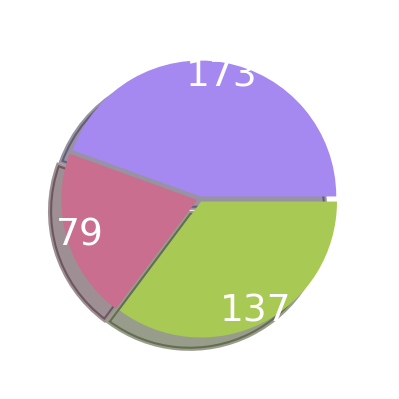

Gráfico guardado.


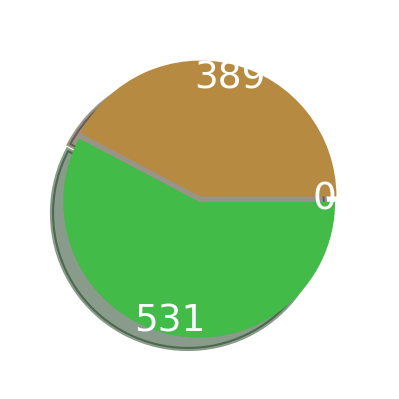

Gráfico guardado.


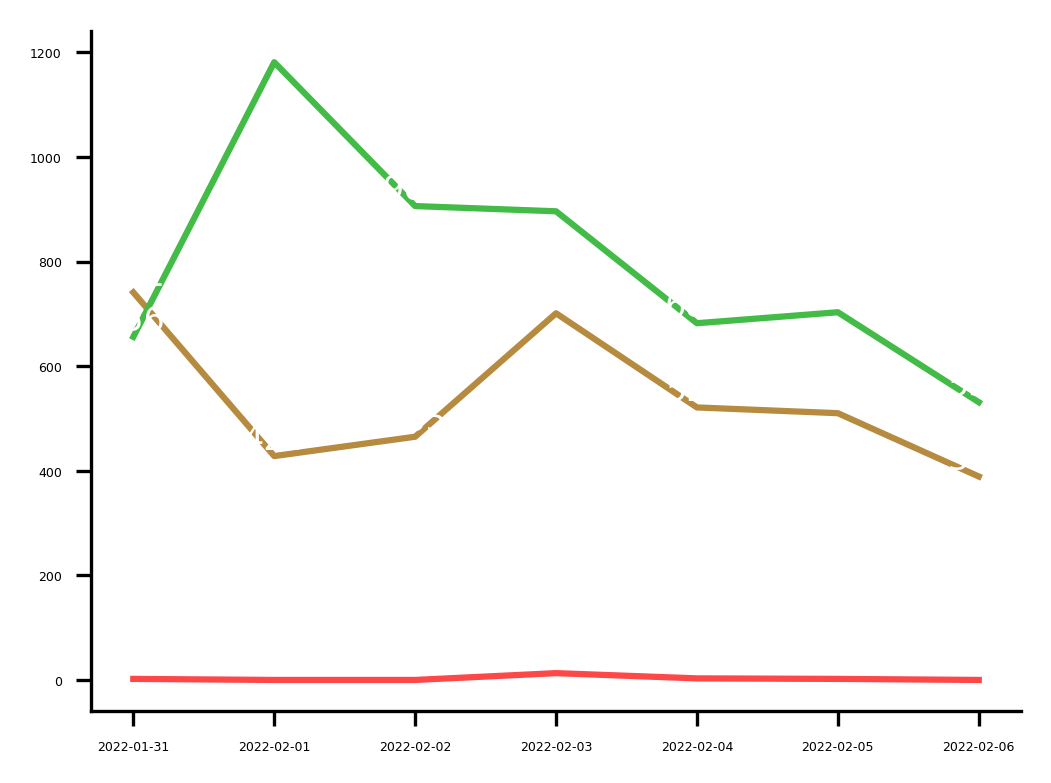

Gráfico guardado.


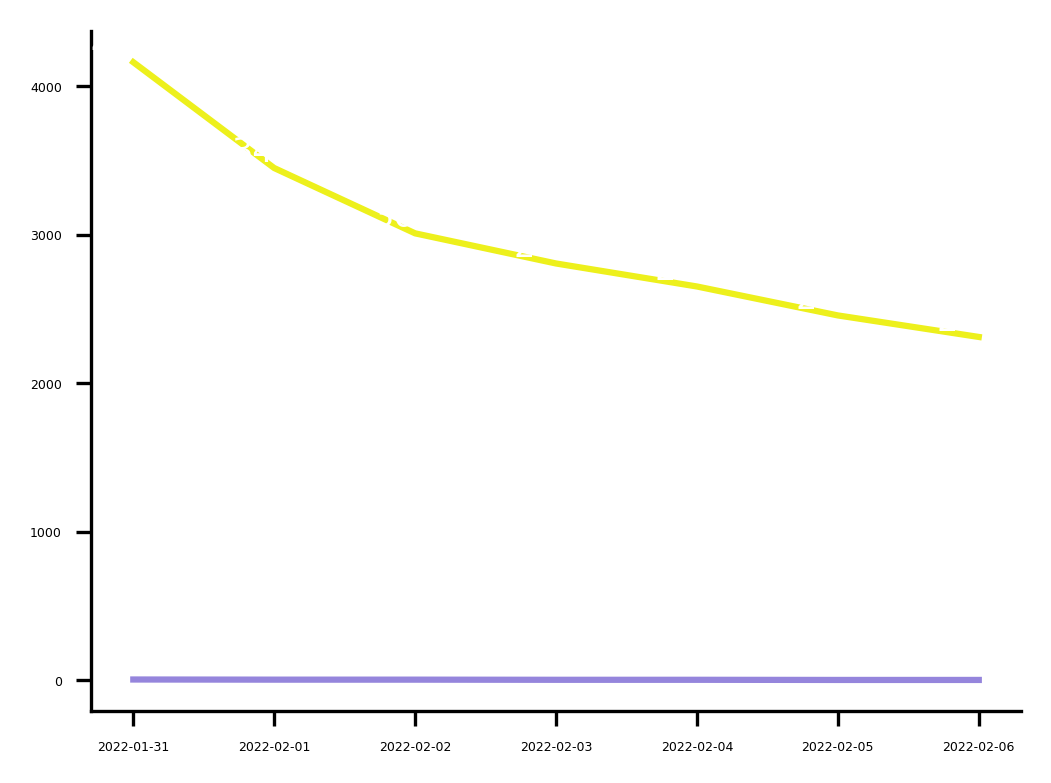

Gráfico guardado.


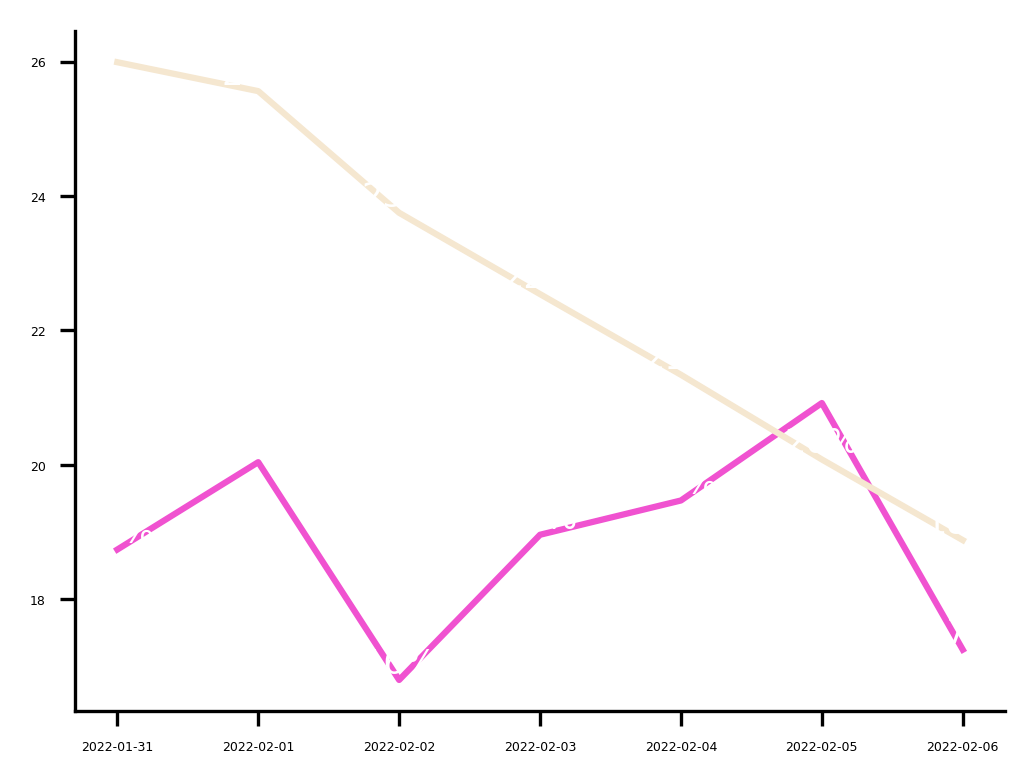

Gráfico guardado.


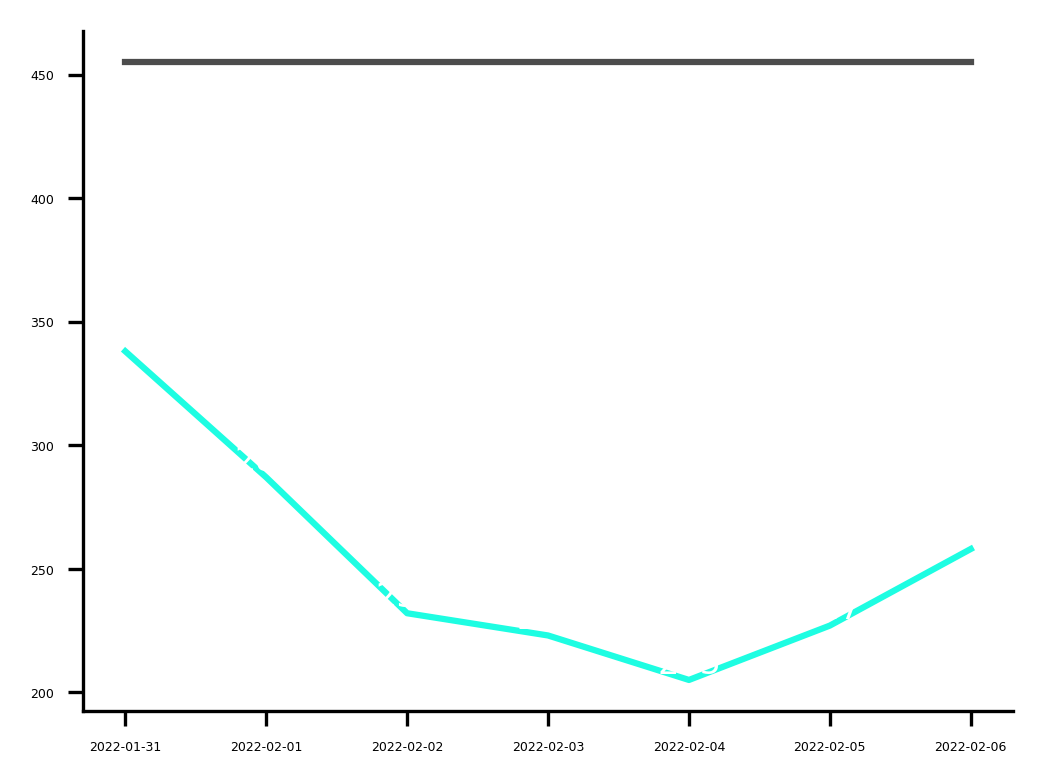

Gráfico guardado.

 
 Gráficos del reporte diario guardados de forma exitosa.


In [8]:
### Graficando para reporte diario ###

### Para gráficos de torta
class graphPie:
    """
    Clase para gráfico de torta.
    Args
    ____
    data: datos para torta
    color: colores
    path: dirección de guardado
    
    """
    def __init__(self, data, color, path):
        fig, ax = plt.subplots(figsize=(1.5, 1.5), subplot_kw=dict(aspect="equal"))
        self.data = data
        self.color = color
        def absolute_value(val):
            a = np.int(np.round(val/100*(np.array(data).sum())))
            return a
        graph = plt.pie(self.data, autopct=absolute_value, shadow=True, colors=self.color, pctdistance=0.9, textprops={'color':'w', 'fontsize': 9}, explode=[0.02, 0.02, 0.02])
        self.path = path
        plt.savefig(self.path)
        plt.show()
        print('Gráfico guardado.')

### Para gráficos de línea
class graphLine:
    """
    Clase para gráfico de barra.
    Args
    ____
    x: eje x
    y: eje y
    color: colores
    path: dirección de guardado
    opt: sufijo de dato
    line: línea paralela a y, ''=True, '#'=False
    liney: valor para line
    sizelabelin: tamaño para texto in-graph
    txth: texto, ''=True, '#'=False
    txt_str: string para txth
    txtx: x para txth
    txty: y para txth
    txts: tamaño para txt
    
    """
    def __init__(self, x, y, color, path, opt='', line='#', liney=1, txth='#', txt_str='', txtx=1, txty=1, txts=20,
                sizelabelin=8):
        self.opt = opt
        self.s = 0
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        self.x = x
        self.y = y
        self.line = line
        self.liney = liney
        self.txth = txth
        self.txt_str = txt_str
        self.txtx = txtx
        self.txty = txty
        self.txts = txts
        self.color = color
        self.path = path
        self.sizelabelin = sizelabelin
        for x in self.x:
            graph = plt.plot(self.x[self.s], self.y[self.s], color=self.color[self.s])
            for i,j in zip(self.x[self.s],self.y[self.s]):
                ax.annotate('{}{}'.format(int(round(j, 1)), self.opt),xy=(i,j), color='w', size=self.sizelabelin, horizontalalignment='center', verticalalignment='bottom')
            exec('{}plt.axhline(self.liney, color="white")'.format(self.line))
            exec('{}ax.text(txtx, txty, txt_str, color="white", size=self.txts)'.format(self.txth))
            self.s += 1
        ax.tick_params(labelsize=3, colors='w', grid_color='w')
        self.path = path
        plt.savefig(self.path)
        ax.tick_params(colors='#000', grid_color='#000')
        ax.spines['bottom'].set_color('#000')
        ax.spines['left'].set_color('#000')
        plt.show()
        print('Gráfico guardado.')

### Primer gráfico: Detalle de casos nuevos
graph1 = graphPie([df['Casos nuevos con sintomas'][weekend_data], df['Casos nuevos sin sintomas'][weekend_data], df['Casos nuevos por laboratorio'][weekend_data]], 
         ['#a688f1', '#ca6e8f', '#a8ca55'], '../../in/diario/grafico/1.png')

### Segundo gráfico: Balance diario
graph2 = graphPie([df['Casos nuevos'][weekend_data], df['Casos recuperados nuevos'][weekend_data], df['Casos fallecidos nuevos'][weekend_data]],
         ['#b68b41', '#43bb48', '#fe4747'], '../../in/diario/grafico/2.png')


### Tercer gráfico: Balance semanal
graph3 = graphLine([df[weekstart_data:weekend_data].index]*3,
                   [df['Casos nuevos'][weekstart_data:weekend_data], df['Casos recuperados nuevos'][weekstart_data:weekend_data], df['Casos fallecidos nuevos'][weekstart_data:weekend_data]],
                   color=['#b68b40', '#43bb47', '#fe4747'],
                   path='../../in/diario/grafico/3.png')

### Cuarto gráfico: Activos semanales
graph4 = graphLine([df[weekstart_data:weekend_data].index]*2,
                   [df['Casos activos confirmados'][weekstart_data:weekend_data], df['Casos activos probables'][weekstart_data:weekend_data]],
                   color=['#edf01c', '#9585dc'],
                   path='../../in/diario/grafico/4.png',)

## Quinto gráfico: Positividad
graph5 = graphLine([df[weekstart_data:weekend_data].index]*2,
                   [df['Positividad diaria'][weekstart_data:weekend_data], df['Positividad media movil *'][weekstart_data:weekend_data]],
                   color=['#f052d0', '#f5e7d0'], 
                   path='../../in/diario/grafico/5.png', opt='%')

### Sexto gráfico: Residencias sanitarias
graph6 = graphLine([df[weekstart_data:weekend_data].index]*2,
                   [df['Cupos en residencias'][weekstart_data:weekend_data], df['Usuarios en residencias'][weekstart_data:weekend_data]],
                   color=['#4c4c4c', '#1efde2'],
                   path='../../in/diario/grafico/6.png')
    
### ¿Todo ok?
print('\n \n Gráficos del reporte diario guardados de forma exitosa.')

### Balance de vacunas

```
### Graficando para balance vacunas ###

### Últimas cifras de vacunación a población total/objetivo
pob_total = np.array([df['Vacunados acumulados 1° dosis'][df['Vacunados acumulados 1° dosis'].last_valid_index()],
          df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] + df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()] - menores18,
          poblacion - df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] - df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()] - menores18])
pob_obj = np.array([df['Vacunados acumulados 1° dosis'][df['Vacunados acumulados 1° dosis'].last_valid_index()],
          df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] + df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()] - menores18,
          poblacion_yomevacuno - df['Vacunados acumulados 2° dosis'][df['Vacunados acumulados 2° dosis'].last_valid_index()] - df['Vacunados acumulados unica dosis'][df['Vacunados acumulados unica dosis'].last_valid_index()] - menores18])
labels = np.array(['Con 1° dosis \n (sin inmunidad o parcial)', 'Con cuadro completo \n (eventual inmunes)', 'Sin cuadro completo \n (sin inmunidad)'])
vacunacion_pct = pd.DataFrame([pob_total, pob_obj]).transpose()
vacunacion_pct.index = labels
vacunacion_pct.columns = ['Población total', 'Población objetivo']

### Para gráficos de barra
class graphBar:
    """
    Clase para gráfico de barra.
    Args
    ____
    x: eje x
    y: eje y
    color: colores
    path: dirección de guardado
    alpha: transparencia
    opt:'' sufijo de dato
    uni:0 booleano (0 para color para todas las barras, 1 para color por cada barra)
    w:4 (ancho)
    l:3 (largo)
    horizontal:0 (gráfico vertical u horizontal)
    rot: rotacion para gráfico con uni=1
    
    """
    def __init__(self, x, y, color, path, alpha, opt='', uni=0, w=4, l=3, horizontal=0, rot=0):
        self.opt = opt
        self.w = 4
        self.l = 3
        self.s = 0
        fig, ax = plt.subplots(figsize=(w, l))
        self.x = x
        self.y = y
        self.color = color
        self.alpha = alpha
        self.path = path
        self.uni = uni
        self.horizontal = 0
        self.rot = rot
        if horizontal == 0:
            if uni == True:
                for x in self.x:
                    ax.bar(self.x[self.s], self.y[self.s], color=self.color, alpha=self.alpha[self.s])
                for i,j in zip(self.x[self.s],self.y[self.s]):
                    ax.annotate('{}{}'.format(format(int(j), ',d'), self.opt),xy=(i,j), color='w', size=9, horizontalalignment='center', verticalalignment='bottom')
                self.s += 1
                plt.xticks(rotation=self.rot)
            else:
                for x in self.x:
                    ax.bar(self.x[self.s], self.y[self.s], color=self.color[self.s], alpha=self.alpha[self.s])
                    for i,j in zip(self.x[self.s],self.y[self.s]):
                        ax.annotate('{}{}'.format(format(int(j), ',d'), self.opt),xy=(i,j), color='w', size=4.5, horizontalalignment='center', verticalalignment='bottom')
                    self.s += 1
                    plt.xticks(rotation=15)
        else:
            for x in self.x:
                ax.barh(width=self.x[self.s], y=self.y[self.s], color=self.color[self.s], alpha=self.alpha[self.s])
                ax.axis('off')
                fig.patch.set_visible(True)
                self.s += 1
        ax.tick_params(labelsize=5, colors='w', grid_color='w')
        ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',d')))
        self.path = path
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        plt.savefig(self.path, bbox_inches = 'tight')
        ax.tick_params(colors='#000', grid_color='#000')
        ax.spines['bottom'].set_color('#000')
        ax.spines['left'].set_color('#000')
        plt.show()
        print('Gráfico guardado.')
        
### Primer gráfico: Proporción objetivo vacunada
graph1 = graphBar([[100], [int(procesovacunacion_hoy)]],
                   [[0], [0]],
                   color=['gray', '#9ad5ff'], alpha=[1, 1],
                   path='../../in/vacuna/grafico/1.png', uni=1, w=1.68, l=0.6, horizontal=1)
vaccine = Image.open(requests.get('https://raw.githubusercontent.com/pandemiaventana/pandemiaventana/main/in/vacuna/grafico/vaccine.png', stream=True).raw).rotate(-90)
pct_ = Image.open('../../in/vacuna/grafico/1.png')
background = Image.new('RGBA', (1000, 1000), (0, 0, 0, 0))
background.paste(pct_, (135,359), pct_)
background.paste(vaccine, (0, 0), vaccine)
background = background.rotate(90).resize((400, 700), Image.ANTIALIAS)
background.save('../../in/vacuna/grafico/1.png')

### Segundo gráfico: Vacunas administradas (1° dosis)
graph2 = graphBar([vacunacion_pct.index],
                   [vacunacion_pct['Población total']],
                   color=['#8899e1', '#9ad5ff', 'gray'], alpha=[1],
                   path='../../in/vacuna/grafico/2.png', uni=1, w=3.5, l=2.5)
        
### Tercer gráfico: Vacunas administradas (1° dosis)
graph3 = graphBar([vacunacion_pct.index],
                   [vacunacion_pct['Población objetivo']],
                   color=['#8899e1', '#9ad5ff', 'gray'], alpha=[1],
                   path='../../in/vacuna/grafico/3.png', uni=1, w=3.5, l=2.5)
        
### Cuarto gráfico: Vacunas administradas (1° dosis)
graph4 = graphBar([vacunacion_etaria.index]*2,
                   [vacunacion_etaria['Poblacion'], vacunacion_etaria['1° Dosis']], 
                   color=['gray', '#8899e1'], alpha=[0.9, 0.9], w=3.5, l=2.5,
                   path='../../in/vacuna/grafico/4.png')

### Quinto gráfico: Vacunas administradas (2° dosis)
graph5 = graphBar([vacunacion_etaria.index]*2,\
                   [vacunacion_etaria['Poblacion'], vacunacion_etaria['2° Dosis'] + vacunacion_etaria['Unica dosis']],
                   color=['gray', '#9ad5ff'], alpha=[0.9, 0.9], w=3.5, l=2.5,
                   path='../../in/vacuna/grafico/5.png')

### ¿Todo ok?
print('\n \n Gráficos del balance de vacunas guardados de forma exitosa.')
```

### Indicador de fase

``` ### Graficando para indicador fase ###

### Primer gráfico: Días por fase por comuna
graph1 = graphBar([df.loc[:, df.columns.str.contains('Paso a Paso (dias)', regex=False)].columns.str[19:]],\
                   [df.loc[:, df.columns.str.contains('Paso a Paso (dias)', regex=False)].loc[df['Paso a Paso (dias) Iquique'].last_valid_index()]], \
                   color=resultado_colores, alpha=[1], \
                   path='../../in/indicadorfase/grafico/1.png', uni=1, w=3.5, l=2.5, rot=15)

### Segundo gráfico: Activos al último informe epidemiológico por comuna
graph2 = graphBar([df.loc[:, df.columns.str.contains('Paso a Paso (dias)', regex=False)].columns.str[19:]],\
                   [(df.loc[:, df.columns.str.contains('Casos activos en')].
loc[df['Casos activos en Iquique'].last_valid_index()].reset_index(drop=True).divide(poblaciones_comunales)*100000)[:7]], \
                   color=resultado_colores + ['white'], alpha=[1], \
                   path='../../in/indicadorfase/grafico/2.png', uni=1, w=3.5, l=2.5, rot=15)

### Tercer gráfico: Fallecidos al último informe epidemiológico por comuna
graph3 = graphBar([df.loc[:, df.columns.str.contains('confirmados DEIS', regex=False)].columns.str[28:]],\
                   [df.loc[:, df.columns.str.contains('confirmados DEIS', regex=False)].loc
                    [df['Fallecidos confirmados DEIS Iquique'].last_valid_index()].reset_index(drop=True).divide(poblaciones_comunales)*100000], \
                   color=resultado_colores, alpha=[1], \
                   path='../../in/indicadorfase/grafico/3.png', uni=1, w=3.5, l=2.5, rot=15)

### Cuarto gráfico: Notificación PCR por comuna
graph4 = graphBar([df.loc[:, df.columns.str.contains('Notificacion PCR', regex=False)].columns.str[17:]],\
                   [df.loc[:, df.columns.str.contains('Notificacion PCR ', regex=False)]
                    .loc[df['Notificacion PCR Iquique'].last_valid_index()].reset_index(drop=True).divide(poblaciones_comunales)*100000], \
                   color=resultado_colores, alpha=[1], \
                   path='../../in/indicadorfase/grafico/4.png', uni=1, w=3.5, l=2.5, rot=15)

### Quinto gráfico: Casos acumulados por comuna
graph5 = graphBar([df.loc[:, df.columns.str.contains('Casos acumulados en', regex=False)].columns.str[20:][:7]],\
                   [(df.loc[:, df.columns.str.contains('Casos acumulados en')].
loc[df['Casos acumulados en Iquique'].last_valid_index()].reset_index(drop=True).divide(poblaciones_comunales)*100000)[:7]], \
                   color=resultado_colores, alpha=[1], \
                   path='../../in/indicadorfase/grafico/5.png', uni=1, w=3.5, l=2.5, rot=15)

### Sexto gráfico: Positividad por comuna
graph6 = graphBar([df.loc[:, df.columns.str.contains('Paso a Paso (dias)', regex=False)].columns.str[19:]],\
                   [df.loc[:, df.columns.str.contains('Positividad ', regex=False) & 
                   ~df.columns.str.contains('diaria', regex=False) &
                   ~df.columns.str.contains('movil', regex=False) &
                   ~df.columns.str.contains('antigeno', regex=False)].loc[positividad_comuna.last_valid_index()]], \
                   color=resultado_colores + ['white'], alpha=[1], \
                   path='../../in/indicadorfase/grafico/6.png', uni=1, w=3.5, l=2.5, rot=15, opt='%')

### Séptimo gráfico: BAC por comuna
graph7 = graphBar([df.loc[:, df.columns.str.contains('BAC', regex=False)].columns.str[4:]],\
                   [df.loc[:, df.columns.str.contains('BAC ', regex=False)].loc[df['BAC Iquique'].last_valid_index()]], \
                   color=resultado_colores, alpha=[1], \
                   path='../../in/indicadorfase/grafico/7.png', uni=1, w=3.5, l=2.5, rot=15, opt='%')

### ¿Todo ok?
print('\n \n Gráficos del indicador de fase guardados de forma exitosa.')
```

```
### Toque de queda

### Para primer gráfico
avance_activos = df['Tasa de activos (incidencia) *'][-14:]
avance_activos = avance_activos[avance_activos.first_valid_index():avance_activos.last_valid_index()].round(0)

## Primer gráfico: tasa de activos
graph1 = graphLine([avance_activos.index],\
                   [avance_activos], \
                   color=['tab:orange'], \
                   path='../../in/toquequeda/grafico/1.png', line='', liney=150,
                   txth='', txt_str='Umbral para toque de queda (menor a 150)', txtx=avance_activos.first_valid_index(),
                  txty=145, txts=6)

## Para segundo gráfico
avance_graph = (df['Vacunados acumulados 2° dosis'] + df['Vacunados acumulados unica dosis'] - menores18)[-14:]/poblacion_yomevacuno*100
avance_graph = avance_graph[avance_graph.first_valid_index():avance_graph.last_valid_index()]
avance_graph = avance_graph.round(0)

## Segundo gráfico: avance vacunación
graph2 = graphLine([avance_graph.index],\
                   [avance_graph], \
                   color=['tab:cyan'], \
                   path='../../in/toquequeda/grafico/2.png', opt='%', line='', liney=80,
                   txth='', txt_str='Umbral para toque de queda (mayor o igual al 80%)', txtx=avance_graph.first_valid_index(),
                  txty=79.6, txts=6, sizelabelin=6)
```

## Generando reportes

---

Teniendo la información recopilada, nos basaremos en el <a href="https://automatetheboringstuff.com/chapter17/">capítulo 17 de manipular imágenes con Python, de @AlSweigart</a> {footcite}``AlSweigart`` para generar las infografías.

El procedimiento manual implicaba exportar archivos .JSON, y a partir de ellos, rellenar manualmente los datos y gráficos en Photoshop, lo que es un proceso tedioso, y altamente susceptible a equivocaciones. 

Debido al párrafo anterior, se intentará automatizar el mismo procedimiento, pero a través de Python, dado que son pasos mecánicos gracias a {cite}``AlSweigart``.

Lo que tenemos que realizar consistirá en los siguientes pasos:

- Rellenar con datos las infografías prediseñadas en Photoshop.

- Colocar imágenes de gráficos según corresponda en las mismas infografías.

- Exportar.



### Reporte diario

In [9]:
### Generando reporte diario ###

### Abriendo gráficos guardados
x = range(1, 7)
for i in x:
    image_path = '../../in/diario/grafico/{}.png'.format(i)
    exec('graph{} = Image.open(image_path)'.format(i))
    i += i

### Cargando imagenes
x = range(1, 11)
for i in x:
    image_path = '../../in/diario/{}.png'.format(i)
    exec('diario_{} = Image.open(image_path)'.format(i))
    exec('diario{} = diario_{}.copy()'.format(i, i))
    i += i
    
### Cargando texto (gracias a Google Fonts y shoes)
roboto = requests.get("https://github.com/googlefonts/roboto/raw/main/src/hinted/Roboto-Regular.ttf")
coolvetica = requests.get("https://github.com/jameshadfield/phandango/blob/master/font/roboto/Roboto-Bold.ttf?raw=true")
roboto_ed = ImageFont.truetype(BytesIO(roboto.content), 50)
roboto_data0 = ImageFont.truetype(BytesIO(roboto.content), 20)
roboto_data1 = ImageFont.truetype(BytesIO(roboto.content), 28)
roboto_data2 = ImageFont.truetype(BytesIO(roboto.content), 30)
roboto_data3 = ImageFont.truetype(BytesIO(roboto.content), 40)
coolvetica_data0 = ImageFont.truetype(BytesIO(coolvetica.content), 43)
coolvetica_data1 = ImageFont.truetype(BytesIO(coolvetica.content), 75)
coolvetica_data2 = ImageFont.truetype(BytesIO(coolvetica.content), 100)
coolvetica_data3 = ImageFont.truetype(BytesIO(coolvetica.content), 100)
coolvetica_data4 = ImageFont.truetype(BytesIO(coolvetica.content), 180)

### Manipulando primera imagen
txt = ImageDraw.Draw(diario1)

### Textos
txt.text((860, 35), '{}° ed.'.format(ed_hoy), fill='#b9b9b9', font=roboto_ed) # edicion
txt.text((380, 357), '{}'.format(df.loc[weekend_data].name.strftime('%d/%m/%Y')), fill='#fff', font=roboto_data1) # fecha
txt.text((650, 435), '{}'.format(casos_hoy), fill='#dfdede', font=coolvetica_data1) # casos nuevos
txt.text((820, 510), '{}'.format(recuperados_hoy), fill='#dfdede', font=coolvetica_data1) # recuperados nuevos
txt.text((745, 585), '{}'.format(fallecidosnuevos_hoy), fill='#dfdede', font=coolvetica_data1) # fallecidos nuevos
txt.text((825, 660), '{}'.format(activos_hoy), fill='#dfdede', font=coolvetica_data1) # activos
txt.text((700, 735), '{}'.format(pcrnuevos_hoy), fill='#dfdede', font=coolvetica_data1) # pcr nuevos
txt.text((700, 810), '{}%'.format(positividad_hoy), fill='#dfdede', font=coolvetica_data1) # positividad diaria
txt.text((760, 890), '{}'.format(residenciasusuarios_hoy), fill='#dfdede', font=coolvetica_data1) # residencias sanitarias
txt.text((790, 965), '{}'.format(ucidiaria_hoy), fill='#dfdede', font=coolvetica_data1) # uci diaria
txt.text((830, 1035), '{}%'.format(procesovacunacion_hoy_4), fill='#dfdede', font=coolvetica_data1) # vac 4°

### Guardamos
diario1.save('../../out/diario/1.png')

### Manipulando segunda imagen
txt = ImageDraw.Draw(diario2)

### Textos (a diferencia de los textos anteriores, debemos centrar a medida se añaden carácteres con 'anchor')
txt.text((190, 670), '{}'.format(consintomas_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos con sintomas
txt.text((190, 750), 'Ayer: {}'.format(consintomas_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos con sintomas
txt.text((540, 670), '{}'.format(sinsintomas_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos sin sintomas
txt.text((540, 750), 'Ayer: {}'.format(sinsintomas_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos sin sintomas
txt.text((890, 670), '{}'.format(porlaboratorio_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos por laboratorio
txt.text((890, 750), 'Ayer: {}'.format(porlaboratorio_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos por laboratorio
txt.text((350, 910), '{} casos nuevos confirmados por antígeno.'.format(antigeno_hoy), fill='#b9b9b9', font=roboto_data1) # nuevos antigeno
txt.text((350, 960), '{} casos del total están con sospecha de reinfección.'.format(reinfeccion_hoy), fill='#b9b9b9', font=roboto_data1) # reinfeccion
 
### Gráficos
diario2.paste(graph1, (570, 50), graph1)

### Guardamos
diario2.save('../../out/diario/2.png')

### Manipulando tercera imagen
txt = ImageDraw.Draw(diario3)

### Textos
txt.text((190, 670), '{}'.format(casos_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos con sintomas
txt.text((190, 750), 'Ayer: {}'.format(casos_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos con sintomas
txt.text((540, 670), '{}'.format(recuperados_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos sin sintomas
txt.text((540, 750), 'Ayer: {}'.format(recuperados_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos sin sintomas
txt.text((890, 670), '{}'.format(fallecidosnuevos_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos por laboratorio
txt.text((890, 750), 'Ayer: {}'.format(fallecidosnuevos_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos por laboratorio
txt.text((190, 860), 'Acumulado: {}'.format(casosacumulados_hoy), fill='#989898', font=roboto_data1, anchor='ms') # nuevos antigeno
txt.text((540, 860), 'Acumulado: {}'.format(recuperadosacumulados_hoy), fill='#989898', font=roboto_data1, anchor='ms') # reinfeccion
txt.text((890, 860), 'Acumulado: {}'.format(fallecidosacumulados_hoy), fill='#989898', font=roboto_data1, anchor='ms') # reinfeccion

### Gráficos
diario3.paste(graph2, (570, 50), graph2)

### Guardamos
diario3.save('../../out/diario/3.png')

### Manipulando cuarta imagen
txt = ImageDraw.Draw(diario4)

### Textos
txt.text((780, 70), '{}'.format(reregional_hoy), fill='#dfdede', font=coolvetica_data2) # casos con sintomas
txt.text((190, 670), '{}'.format(pcrnuevos_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos con sintomas
txt.text((190, 750), 'Ayer: {}'.format(pcrnuevos_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos con sintomas
txt.text((540, 670), '{}'.format(residenciasusuarios_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos sin sintomas
txt.text((540, 750), 'Ayer: {}'.format(residenciasusuarios_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos sin sintomas
txt.text((890, 670), '{}'.format(activos_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos por laboratorio
txt.text((890, 750), 'Ayer: {}'.format(activos_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos por laboratorio
txt.text((190, 860), 'Acumulado: {}'.format(pcracumulados_hoy), fill='#989898', font=roboto_data1, anchor='ms') # nuevos antigeno
txt.text((540, 860), 'Establecimientos: {}'.format(residenciasnumero_hoy), fill='#989898', font=roboto_data1, anchor='ms') # reinfeccion
txt.text((890, 860), 'Incidencia: {}'.format(tasa_activos), fill='#989898', font=roboto_data1, anchor='ms') # reinfeccion

### Guardamos
diario4.save('../../out/diario/4.png')

### Manipulando quinta imagen
txt = ImageDraw.Draw(diario5)

### Textos
txt.text((750, 90), '{}%'.format(positividadmovil_hoy), fill='#dfdede', font=coolvetica_data2) # casos con sintomas
txt.text((190, 670), '{}%'.format(positividad_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos con sintomas
txt.text((190, 750), 'Ayer: {}%'.format(positividad_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos con sintomas
txt.text((190, 860), 'Antígeno: {}%'.format(positividad_antigeno), fill='#989898', font=roboto_data1, anchor='ms') # nuevos antigeno
txt.text((540, 670), '{}%'.format(procesovacunacion_hoy, 0), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos sin sintomas
txt.text((540, 750), 'Antes: {}%'.format(procesovacunacion_ayer, 0), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos sin sintomas
txt.text((890, 670), '{}'.format(me_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos por laboratorio
txt.text((890, 750), 'Ayer: {}'.format(me_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos por laboratorio
txt.text((540, 860), 'Acum. 2° dosis: {}'.format(procesovacunaciontotales_hoy), fill='#989898', font=roboto_data1, anchor='ms') # nuevos antigeno

### Guardamos
diario5.save('../../out/diario/5.png')

### Manipulando sexta imagen
txt = ImageDraw.Draw(diario6)

### Textos
txt.text((780, 70), '{}'.format(tasanuevos_hoy), fill='#dfdede', font=coolvetica_data2) # casos con sintomas
txt.text((280, 670), '{}'.format(activosprobables_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos con sintomas
txt.text((280, 750), 'Ayer: {}'.format(activosprobables_ayer), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos con sintomas
txt.text((800, 670), '{}%'.format(uciaprox_hoy), fill='#dfdede', font=coolvetica_data2, anchor='ms') # casos sin sintomas
txt.text((800, 750), 'Error aprox.: ±{}%'.format(errorabs_hoy), fill='#989898', font=roboto_data3, anchor='ms') # ayer, casos sin sintomas

### Guardamos
diario6.save('../../out/diario/6.png')

### Manipulando séptima, octava, novena y décima imagen
x = range(7, 11)
for i in x:
    ### Gráficos
    exec('diario{}.paste(graph{}, (-55, 155), graph{})'.format(i, i-4, i-4))
    ### Guardamos
    exec('diario{}.save("../../out/diario/{}.png")'.format(i, i))
    i += i
    
### ¿Todo ok?
display(Markdown('> Todas las imágenes del reporte diario han sido correctamente exportadas.'))

### Guardamos a PDF
pdfs = []
for i in range(2, 11):
    exec('pdfs += [diario{}]'.format(i))

### Histórico
diario1.convert('RGB').save('../../out/diario/pdf/{}.pdf'.format(df['Casos nuevos'].last_valid_index().strftime('%Y.%m.%d'),
                                                 df['Casos nuevos'].last_valid_index().strftime('%Y.%m.%d')
                                             ), save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### Última actualización
diario1.convert('RGB').save('../../out/diario/pdf/ult/ult.pdf', save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### ¿Todo ok?
display(Markdown('> El PDF del reporte diario ha sido exportado.'))

> Todas las imágenes del reporte diario han sido correctamente exportadas.

> El PDF del reporte diario ha sido exportado.

### Balance de vacunas

```
### Generando balance de vacunas ###

### Abriendo gráficos guardados
x = range(1, 6)
for i in x:
    image_path = '../../in/vacuna/grafico/{}.png'.format(i)
    exec('graph{} = Image.open(image_path)'.format(i))
    i += i

### Cargando imagenes
for i in x:
    image_path = '../../in/vacuna/{}.png'.format(i)
    exec('vacuna{} = Image.open(image_path)'.format(i))
    exec('vacuna{} = vacuna{}.copy()'.format(i, i))
    i += i

### Manipulando primera, segunda, tercera y cuarta imagen
for i in x:
    ### Gráficos
    if i == 1:
        txt = ImageDraw.Draw(vacuna1)
        txt.text((860, 35), '{}° ed.'.format(ed_vacuna), fill='#b9b9b9', font=roboto_ed) # edicion
        txt.text((380, 357), '{}'.format(df.loc[weekend_data].name.strftime('%d/%m/%Y')), fill='#fff', font=roboto_data1) # fecha
        txt.text((480, 500), '{}'.format('{}%'.format(procesovacunacion_hoy)), fill='#9ad5ff', font=coolvetica_data4) # avance
        txt.text((420, 670), 'Con esquema de vacunación', fill='white', font=roboto_data3) # texto1
        txt.text((420, 710), 'completo (2° dosis o única)', fill='white', font=roboto_data3) # texto2
        txt.text((425, 800), '{}'.format(format(int(vacunacion_pct['Población objetivo'][-1]), ',d')), fill='gray', font=coolvetica_data4) #restante
        txt.text((420, 990), 'Personas deben iniciar o', fill='white', font=roboto_data3) #texto3
        txt.text((420, 1030), 'completar su vacunación', fill='white', font=roboto_data3) #texto4
        exec('vacuna{}.paste(graph{}, (100, 410), graph{})'.format(i, i, i))
    elif i == 2 or i == 3:
        exec('vacuna{}.paste(graph{}, (50, 250), graph{})'.format(i, i, i))
    else:
        exec('vacuna{}.paste(graph{}, (60, 240), graph{})'.format(i, i, i))
    ### Guardamos
    exec('vacuna{}.save("../../out/vacuna/{}.png")'.format(i, i))
    i += i

### ¿Todo ok?
display(Markdown('> Todas las imágenes del balance de vacunas han sido correctamente exportadas.'))

### Guardamos a PDF
pdfs = []
for i in range(2, 6):
    exec('pdfs += [vacuna{}]'.format(i))

### Histórico    
vacuna1.convert('RGB').save('../../out/vacuna/pdf/{}.pdf'.format(df['Casos nuevos'].last_valid_index().strftime('%Y.%m.%d')
                                             ), save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### Última actualización
vacuna1.convert('RGB').save('../../out/vacuna/pdf/ult/ult.pdf', save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### ¿Todo ok?
display(Markdown('> El PDF del balance de vacunas ha sido exportado.'))
```

### Indicador de fase

```
### Indicador de fase ###

### Abriendo gráficos guardados
x = range(1, 8)
for i in x:
    image_path = '../../in/indicadorfase/grafico/{}.png'.format(i)
    exec('graph{} = Image.open(image_path)'.format(i))
    i += i

### Cargando imagenes
x = range(1, 10)
for i in x:
    image_path = '../../in/indicadorfase/{}.png'.format(i)
    exec('indicadorfase{} = Image.open(image_path)'.format(i))
    exec('indicadorfase{} = indicadorfase{}.copy()'.format(i, i))
    i += i

### Manipulando primera, segunda, tercera y cuarta imagen

### Para ir arreglando alto
b = 0

### Para tener índice de vector de colores
co = 0

for i in x:
    ### Gráficos
    if i == 1:
        txt = ImageDraw.Draw(indicadorfase1)
        txt.text((860, 35), '{}° ed.'.format(ed_indicador), fill='#b9b9b9', font=roboto_ed) # edicion
        txt.text((360, 380), '{}'.format(df['Casos acumulados en Iquique'].last_valid_index().strftime('%d/%m/%Y')), fill='#fff', font=roboto_data1) # fecha
        for val in resultado_prediccion:
            txt.text((490, 512 + b), '{} '.format(str(int(resultado_prob[co].round(0))) + '%'), fill='#fff', font=roboto_data3) # prob
            txt.text((670, 512 + b), '{}'.format(val), fill=resultado_colores[co], font=roboto_data3) # resultado
            b += 72
            co += 1
    elif i == 2:
        pass
    else:
        exec('indicadorfase{}.paste(graph{}, (60, 250), graph{})'.format(i, i-2, i-2))
    ### Guardamos
    exec('indicadorfase{}.save("../../out/indicadorfase/{}.png")'.format(i, i))
    i += i

### ¿Todo ok?
display(Markdown('> Todas las imágenes del indicador de fase han sido correctamente exportadas.'))

### Guardamos a PDF
pdfs = []
for i in range(2, 10):
    exec('pdfs += [indicadorfase{}]'.format(i))
    
### Histórico
indicadorfase1.convert('RGB').save('../../out/indicadorfase/pdf/{}.pdf'.format(df['Casos acumulados en Alto Hospicio'].last_valid_index().strftime('%Y.%m.%d')
                                             ), save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### Última actualización
indicadorfase1.convert('RGB').save('../../out/indicadorfase/pdf/ult/ult.pdf', save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### ¿Todo ok?
display(Markdown('> El PDF del indicador de fase ha sido exportado.'))
```

### Toque de queda

```
### Indicador de fase ###

### Abriendo gráficos guardados
x = range(1, 3)
for i in x:
    image_path = '../../in/toquequeda/grafico/{}.png'.format(i)
    exec('graph{} = Image.open(image_path)'.format(i))
    i += i

### Cargando imagenes
x = range(1, 3)
for i in x:
    image_path = '../../in/toquequeda/{}.png'.format(i)
    exec('toquequeda{} = Image.open(image_path)'.format(i))
    exec('toquequeda{} = toquequeda{}.copy()'.format(i, i))
    i += i

for i in x:
    exec('toquequeda{}.paste(graph{}, (-50, 100), graph{})'.format(i, i, i))
    exec("txt = ImageDraw.Draw(toquequeda{})".format(i))
    txt.text((920, 5), '{}'.format(df.loc[weekend_data].name.strftime('%d/%m/%Y')), fill='#fff', font=roboto_data1) # fecha
    exec('toquequeda{}.save("../../out/toquequeda/{}.png")'.format(i, i))
    
### ¿Todo ok?
display(Markdown('> Todas las imágenes del reporte del toque de queda han sido correctamente exportadas.'))

### Guardamos a PDF
pdfs = []
for i in range(2, 3):
    exec('pdfs += [toquequeda{}]'.format(i))
    
### Histórico
toquequeda1.convert('RGB').save('../../out/toquequeda/pdf/{}.pdf'.format(df['Tasa de activos (incidencia) *'].last_valid_index().strftime('%Y.%m.%d')
                                             ), save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### Última actualización
toquequeda1.convert('RGB').save('../../out/toquequeda/pdf/ult/ult.pdf', save_all=True, append_images=[pdf.convert('RGB') for pdf in pdfs])

### ¿Todo ok?
display(Markdown('> El PDF del reporte de toque de queda ha sido exportado.'))
```

## Resultado

---

### Reporte diario

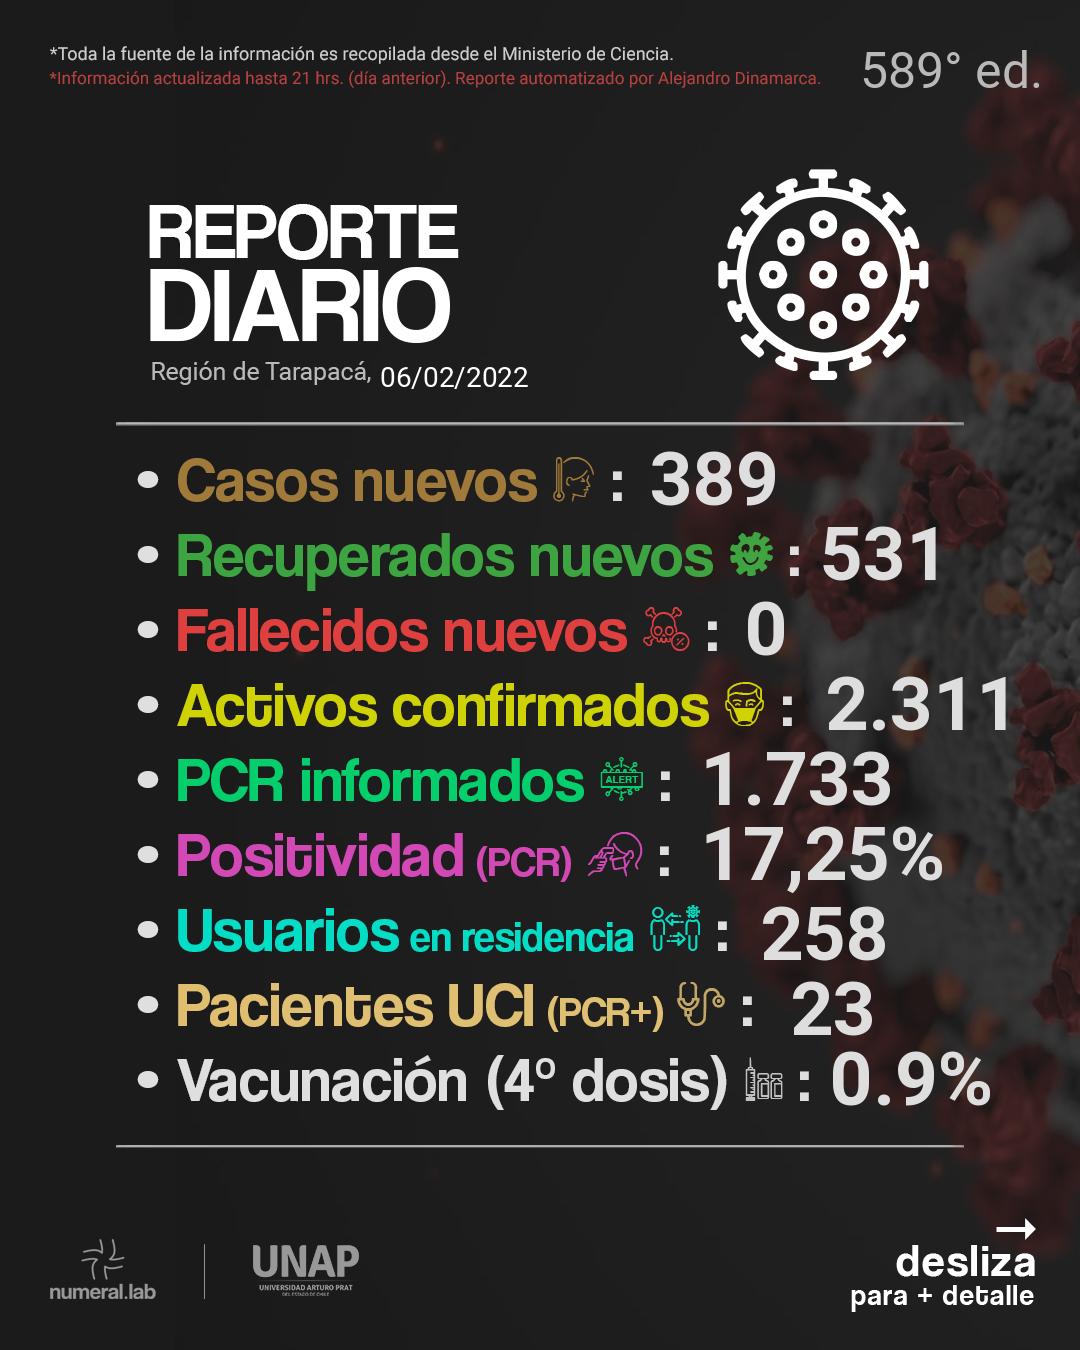

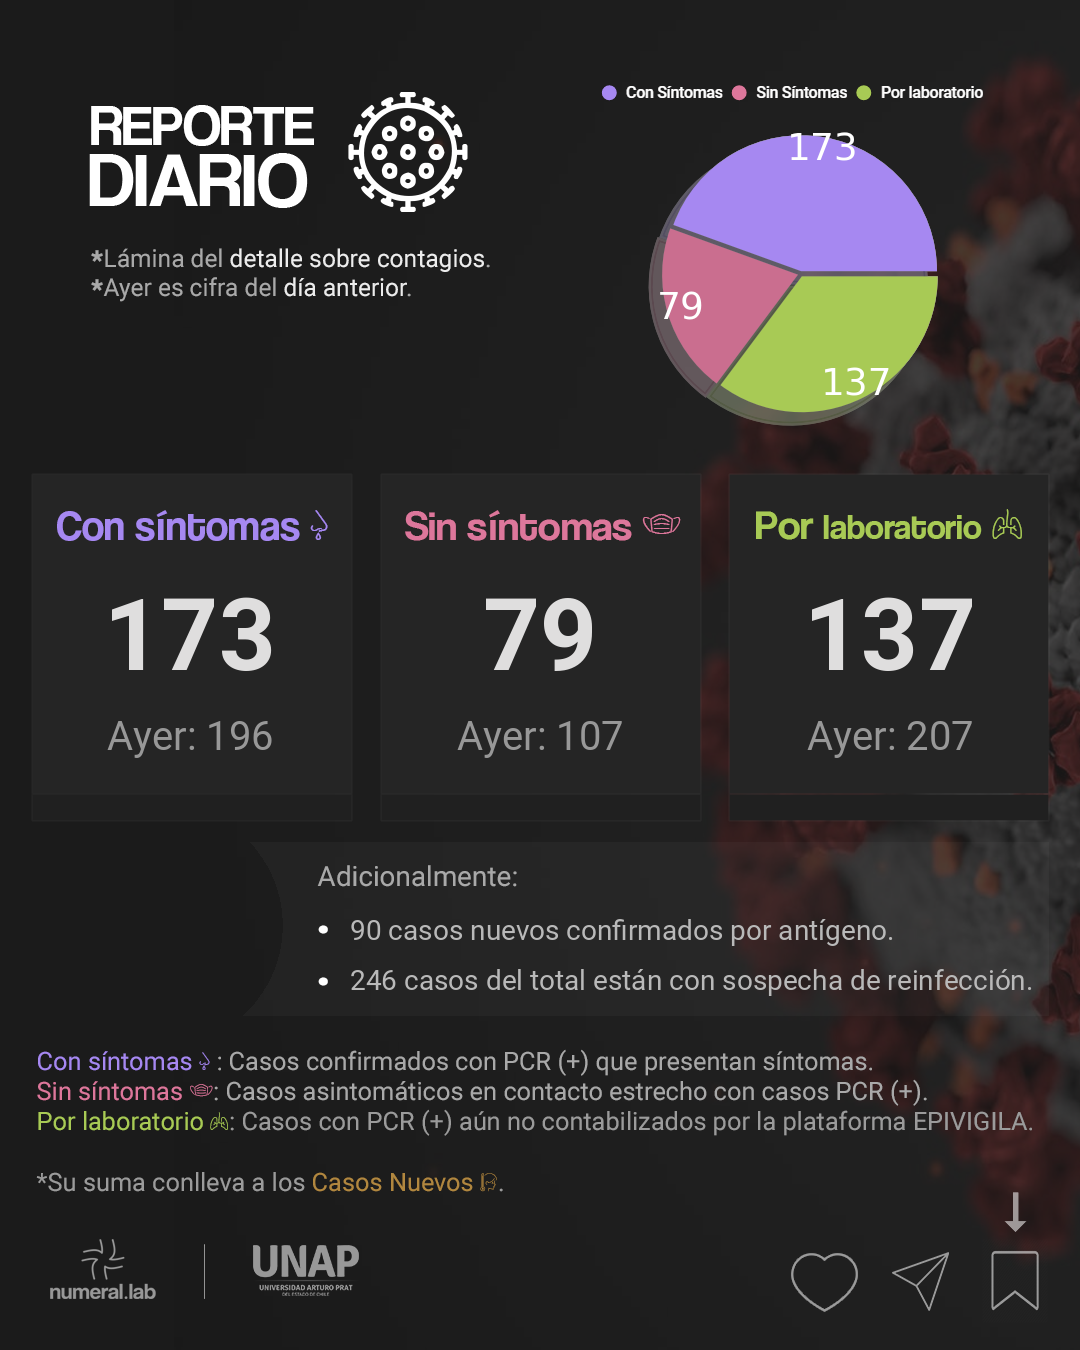

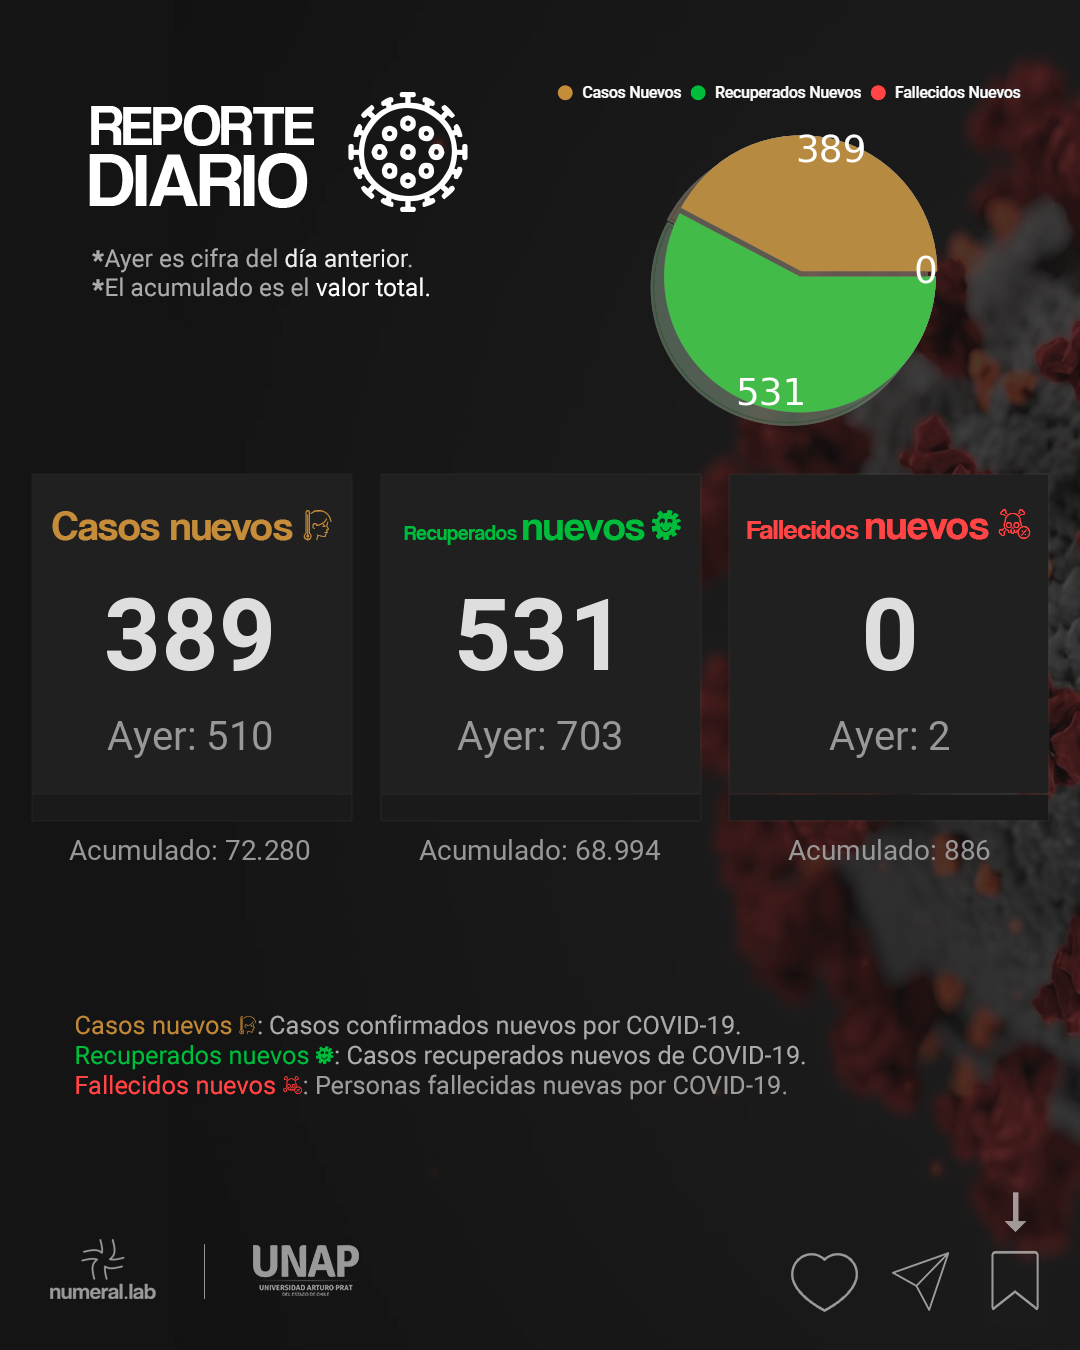

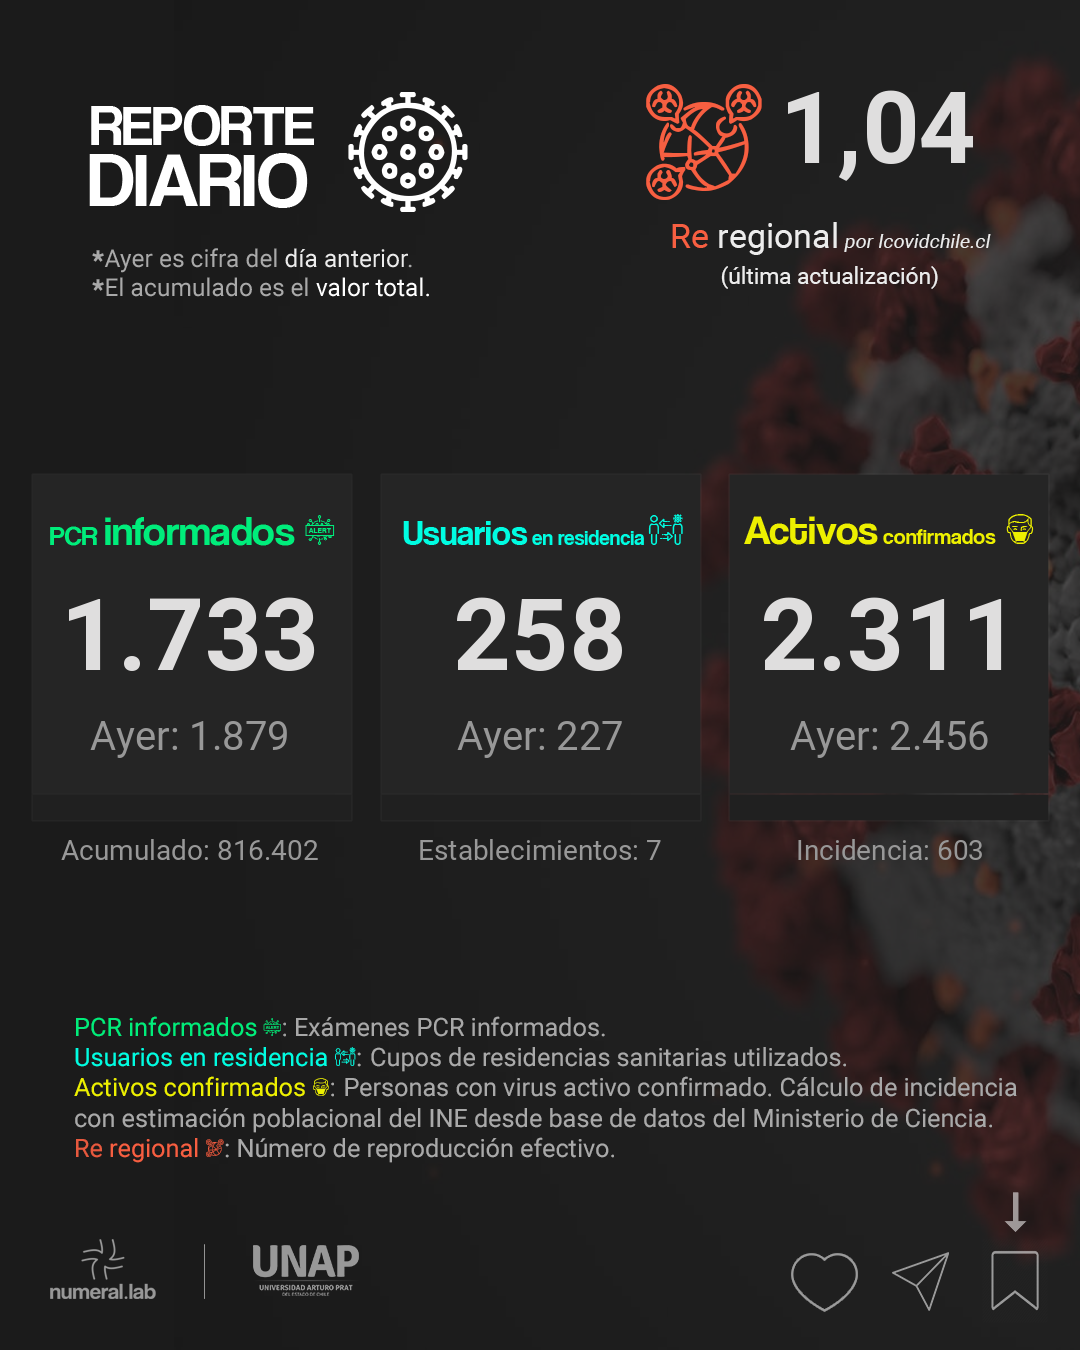

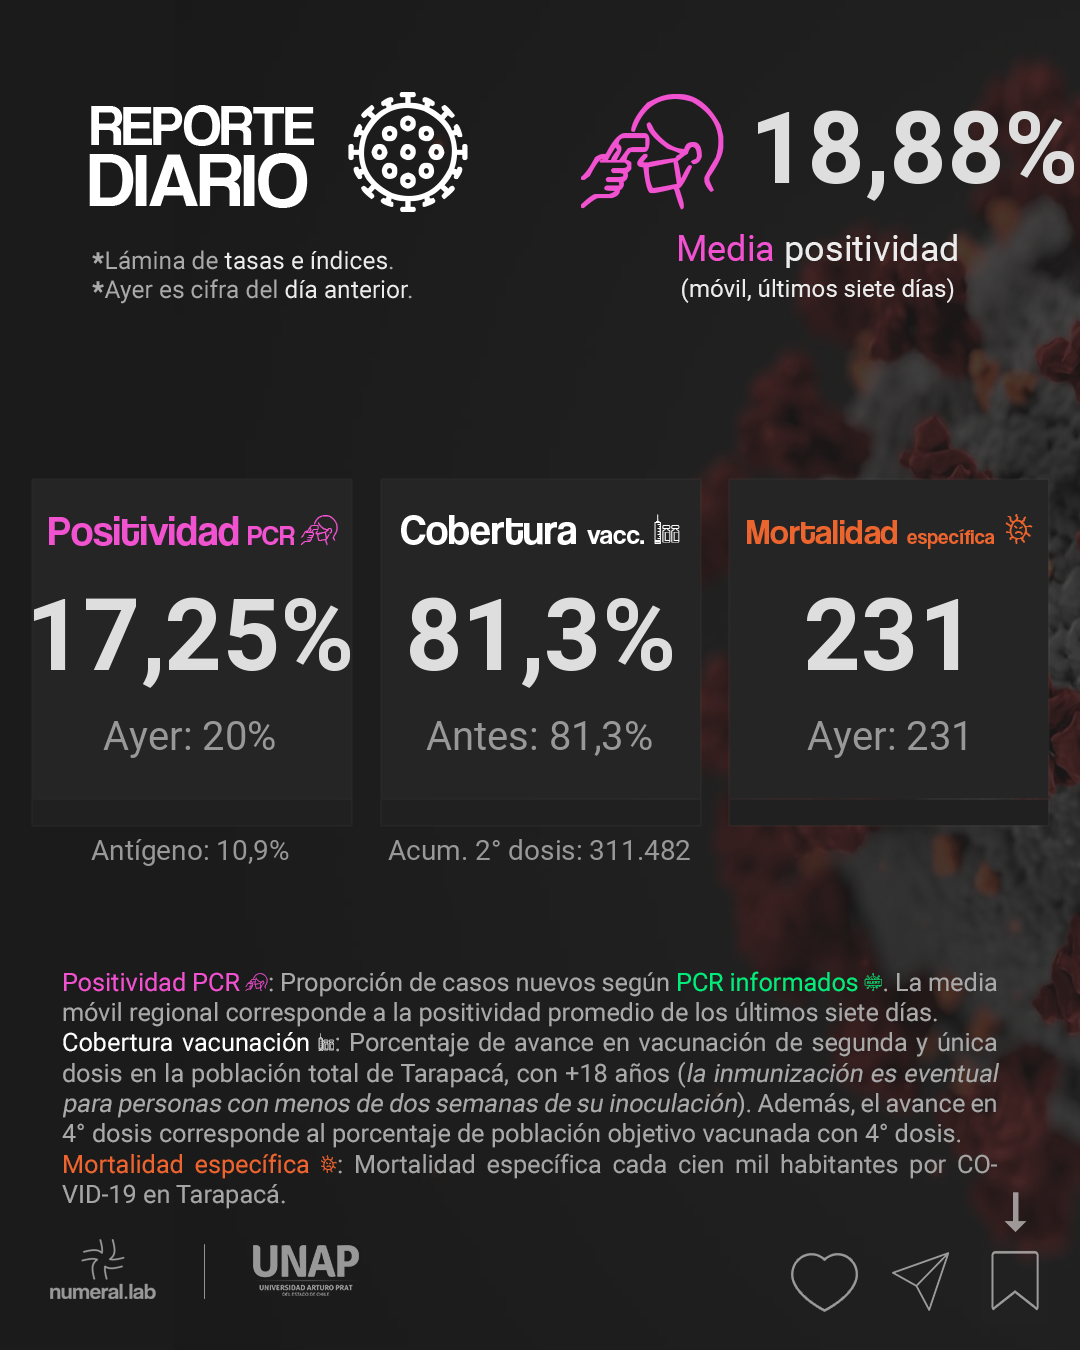

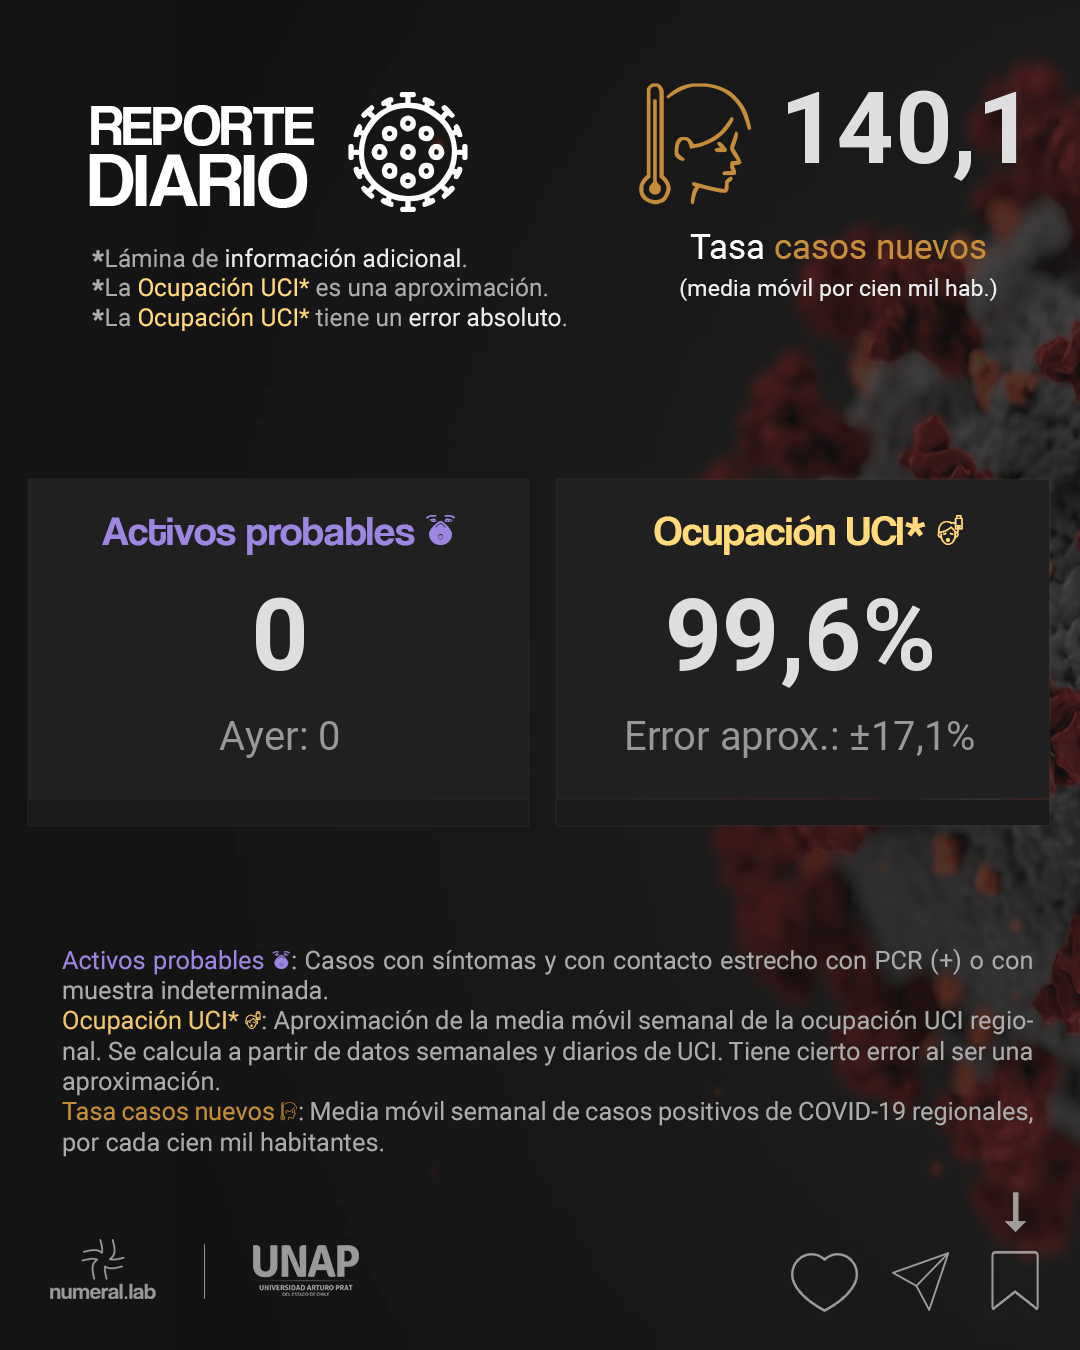

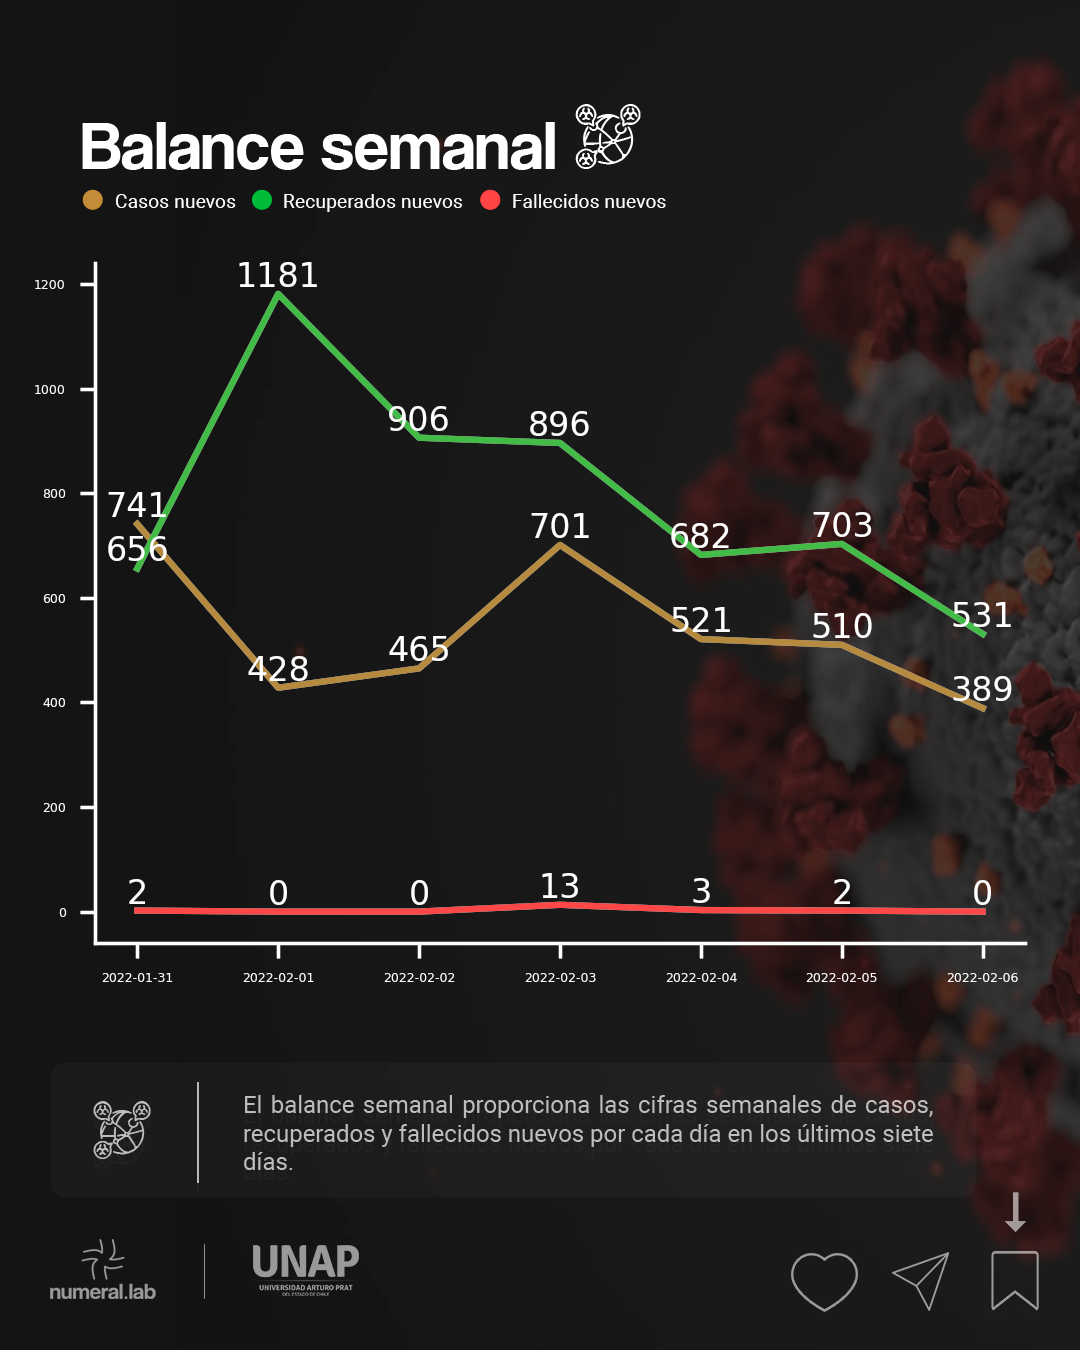

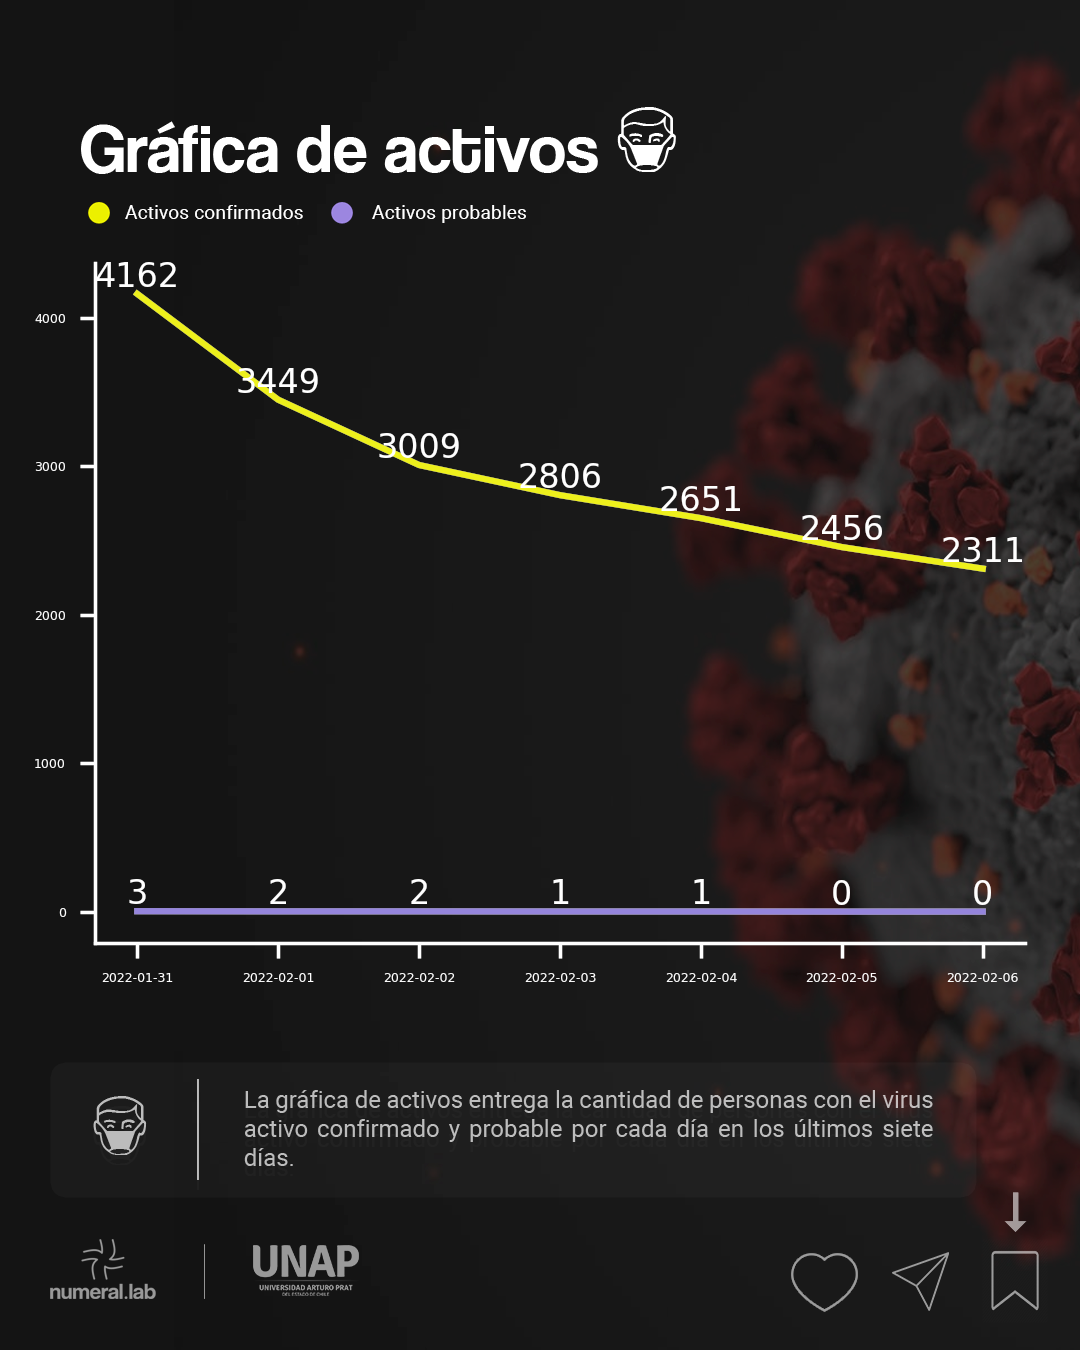

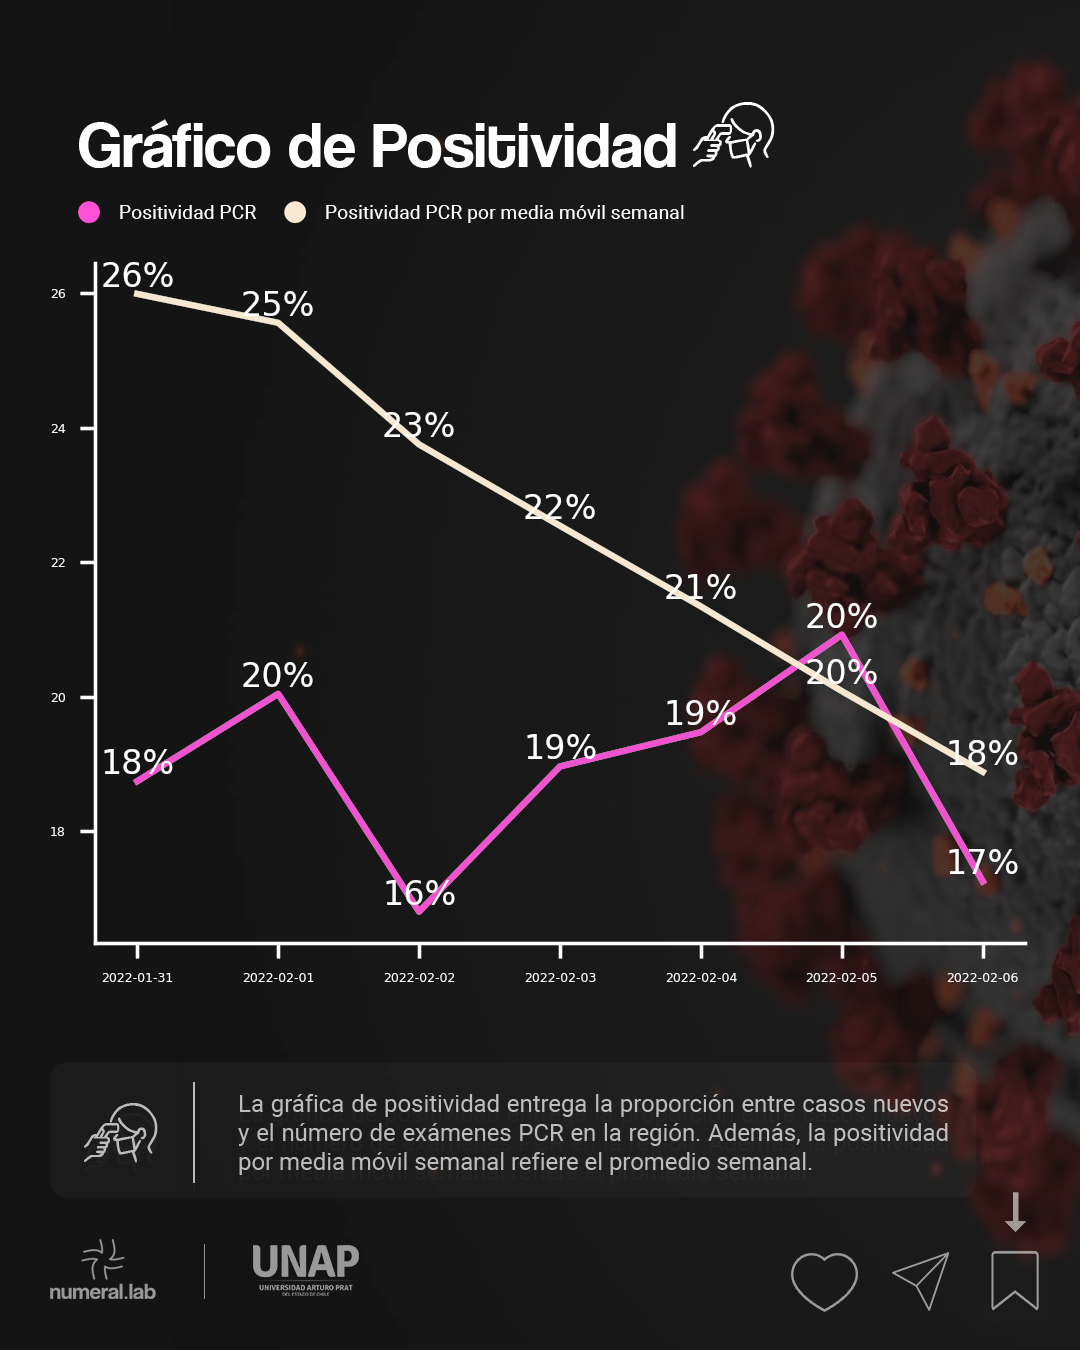

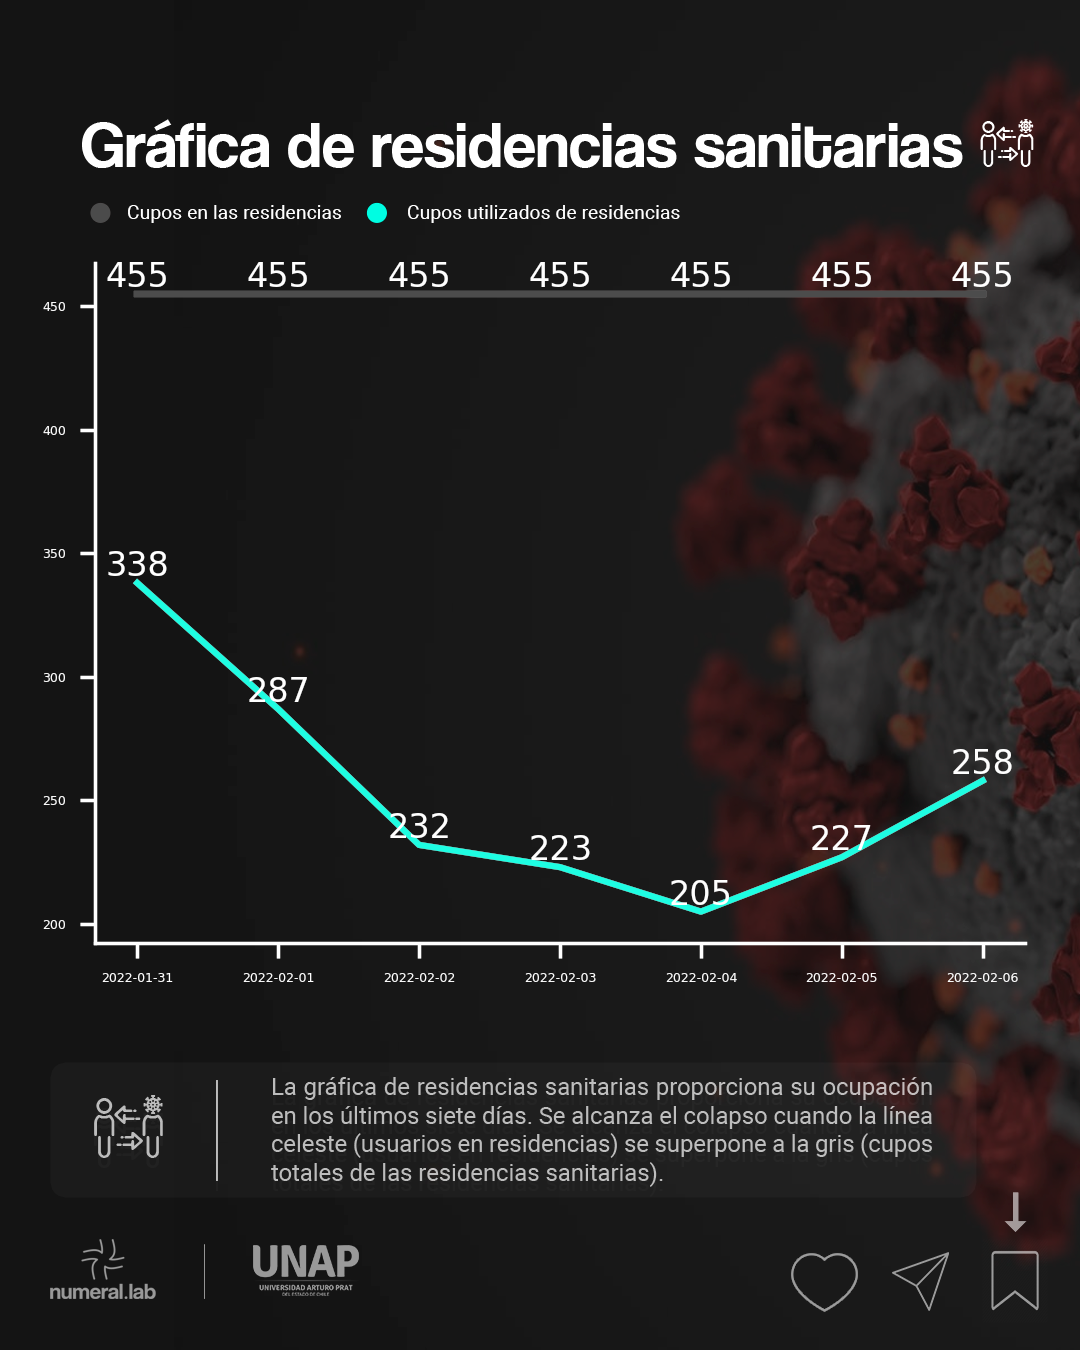

In [10]:
### Mostramos las imágenes del reporte diario
x = range(1, 11)
for i in x:
    exec('diario{} = Image.open("../../out/diario/{}.png")'.format(i, i))
    exec('display(diario{})'.format(i))

### Balance vacunas

```
### Mostramos las imágenes del balance de vacunas
x = range(1, 6)
for i in x:
    exec('diario{} = Image.open("../../out/vacuna/{}.png")'.format(i, i))
    exec('display(vacuna{})'.format(i))
```

### Indicador de fase

```
### Mostramos las imágenes del indicador de fase
x = range(1, 10)
for i in x:
    exec('diario{} = Image.open("../../out/indicadorfase/{}.png")'.format(i, i))
    exec('display(indicadorfase{})'.format(i))
```

### Toque de queda

```
### Mostramos las imágenes del indicador de fase
x = range(1, 3)
for i in x:
    exec('toquequeda{} = Image.open("../../out/toquequeda/{}.png")'.format(i, i))
    exec('display(toquequeda{})'.format(i))
```

## Ejemplos

La presente sección recopila los ejemplos mencionados en el notebook. Están recopilados a fin de fácil entendimiento (o al menos, en intento de).

(ejemplo1)=
### Ejemplo (1)

¿Cómo se ve un archivo .CSV?

In [11]:
### Ejemplo 1 ###

csv = """

Nombre,Apellido,Universidad
Juan,Ponce,uchile
Ermógenes,Pérez,usch

"""

### Lo leemos con Pandas
pd.read_csv(StringIO(csv))

Nombre Apellido Universidad
0       Juan    Ponce      uchile
1  Ermógenes    Pérez        usch

(ejemplo2)=
### Ejemplo (2)

¿Cuál es la media de error de la aproximación UCI?

La media móvil del error de la última semana es de:  17.09 %
La media general del error es de:  0.58 %


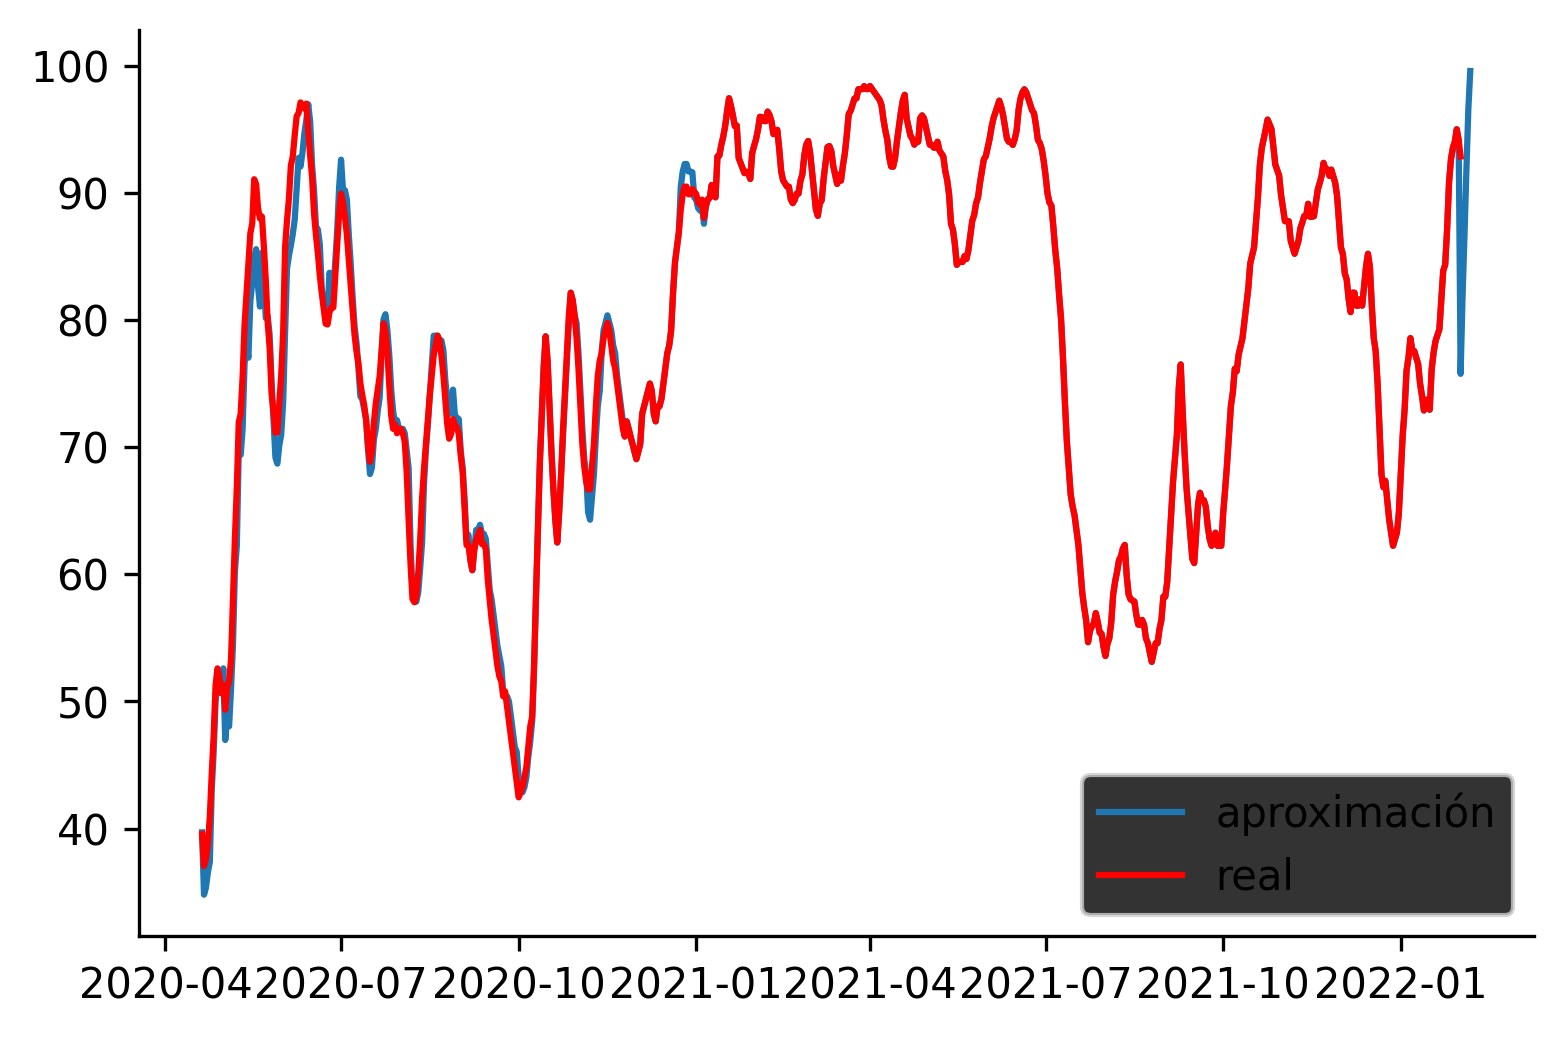

In [12]:
### Ejemplo 2 ###
### Para media móvil semanal, solo seleccionamos el último dato
print('La media móvil del error de la última semana es de: ', df['UCI error abs *'][df['UCI error abs *'].last_valid_index()], '%')
### Para la media general, promediamos todos los datos
print('La media general del error es de: ', round(df['UCI error abs *'].mean(), 2), '%')

### ¿En qué se traduce el error? En las distancias entre ambas curvas
plt.plot(df.index[df['UCI ocupacion media movil aprox *'] != 0], \
         df['UCI ocupacion media movil aprox *'][df['UCI ocupacion media movil aprox *'] != 0], label='aproximación')
plt.plot(df.index[df['UCI ocupacion media movil real'] != 0], \
         df['UCI ocupacion media movil real'][df['UCI ocupacion media movil real'] != 0], color='r', label='real')
plt.legend()
plt.show()

## Aclaraciones

### Con relación a conceptos del Ministerio de Salud

(1_aclaracion)=
#### Casos activos confirmados

**¿Por qué los casos activos confirmados del reporte diario del Minsal no calzan con los del reporte epidemiológico?** Ésto se debe a que, el reporte diario del Minsal:

- No contempla en la suma de activos confirmados, a los activos probables {footcite}``b51-536``, en el reporte diario del Ministerio de Salud.

(2_aclaracion)=
#### Casos confirmados acumulados

**¿Por qué los casos confirmados acumulados del reporte diario del Minsal no calzan con el total del reporte epidemiológico?** Ésto se debe a dos situaciones con respecto al reporte diario del Minsal:

- No se contemplan casos probables {footcite}``b51-536``, en la suma de casos totales, en el reporte diario del Ministerio de Salud.

<br>

- No se contemplan casos notificados por laboratorio {footcite}``epi-04-06-2021``, en la suma total, en el reporte diario del Ministerio de Salud.

Ésto implica que:

$$ 
\begin{align}
\Large TOTAL = casos_{confirmados \ notificados} + casos_{probables} + casos_{notificados \ laboratorio}
\end{align}
$$ (casos_epidemiologico)

#### Definiciones

Respecto a las definiciones de la nomenclatura:

- Los casos probables, por definición {footcite}``b51-536``, "<i>Persona que cumple con la definición de caso sospechoso y tiene un resultado indeterminado o no concluyente de la RT-PCR, o persona asintomática o con un síntoma no cardinal, que tiene un resultado positivo para una prueba de detección rápida de antígenos para SARS-CoV-2, o bien, persona que cumple con la definición de caso sospechoso en el cual el resultado de la RT-PCR es negativo o indeterminado o no concluyente, pero que tiene una tomografía computarizada de tórax con imágenes sugerentes de COVID-19</i>" según {cite}``b51-536``.

<br>

- Los casos notificados por laboratorio, por definición {footcite}``epi-04-06-2021``, "<i>Persona que tiene un resultado de RT-PCR positivo para SARS-CoV-2 pero que no está registrada en la plataforma EPIVIGILA</i>" según {cite}``epi-04-06-2021``.

## Requerimientos

Obviar esta celda. Está hecha para que el action [actualiza_libro](https://github.com/pandemiaventana/pandemiaventana/actions/workflows/book.yml) funcione correctamente según librerías utilizadas en el Notebook.

In [13]:
### Gracias a Alex P. Miller (https://stackoverflow.com/a/49199019/13746427) ###
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
req = ''
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
        

for r in requirements:
    req += """{}=={}
""".format(*r)
req += """jupyter-book
""" + """session_info
""" + """markdownify
""" + """bs4
""" + """natsort"""

### Abrimos y modificamos requirements.txt
with open('../../requirements.txt', 'w') as f:
    f.write(req)
    # ...

## Información de sesión

In [14]:
session_info.show(cpu=True, jupyter=True, std_lib=True, write_req_file=True, dependencies=True, req_file_name='1_requeriments.txt')

## Bibliografía de esta página

```{footbibliography}
```
